## Exploratory Data Analysis

Loading all the data we have and merging it into one DataFrame for further analysis.

In [33]:
import pandas as pd

In [34]:
import pandas as pd
import os
from functools import reduce

def read_and_merge_all_data(data_dir="data/out/"):
    """
    Read all CSV files from data/out/ directory and merge them on YEAR and COUNTRYCODE
    """
    # Get all CSV files in the directory
    csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]
    
    if not csv_files:
        print(f"No CSV files found in {data_dir}")
        return pd.DataFrame()
    
    dataframes = []
    
    for file in csv_files:
        file_path = os.path.join(data_dir, file)
        try:
            df = pd.read_csv(file_path)
            print(f"Loaded {file}: {df.shape}")
            
            # Check if the required columns exist
            if 'YEAR' in df.columns and 'COUNTRYCODE' in df.columns:
                dataframes.append(df)
            else:
                print(f"Warning: {file} doesn't have YEAR and COUNTRYCODE columns, skipping...")
                
        except Exception as e:
            print(f"Error reading {file}: {e}")
    
    if not dataframes:
        print("No valid dataframes to merge")
        return pd.DataFrame()
    
    # Merge all dataframes
    print("Merging all dataframes...")
    merged_df = reduce(lambda left, right: pd.merge(left, right, on=['YEAR', 'COUNTRYCODE'], how='outer'), dataframes)
    
    print(f"Final merged dataframe shape: {merged_df.shape}")
    return merged_df

# Use the function
SELECTED_COUNTRIES = ["USA", "GBR", "CHN"] #, "RUS", "CHN", "IND", "DEU", "FRA", "JPN", "CHE", "ARG"]

merged_df = read_and_merge_all_data()
merged_df

Loaded all_clio_data.csv: (98757, 42)
Loaded all_clio_data_pt2.csv: (41657, 16)
Loaded md_data.csv: (45264, 5)
Loaded nobel_laureates.csv: (647, 3)
Loaded owd-armed-forces-personnel.csv: (5824, 3)
Loaded owd_armed_forces_percent_population.csv: (5602, 3)
Loaded owd_education_government_expenditure_gdp.csv: (5381, 3)
Loaded owd_education_tertiary_completion_rate.csv: (4311, 3)
Loaded owd_exported_goods_as_share_of_gdp.csv: (13808, 3)
Loaded owd_exported_goods_gdp_share.csv: (13101, 3)
Loaded owd_military-spending.csv: (15547, 3)
Loaded owd_military_spending_as_share_of_gdp.csv: (8366, 3)
Loaded wipo_patents.csv: (3621, 3)
Merging all dataframes...
Final merged dataframe shape: (112151, 69)


COUNTRYCODE  YEAR  ARMEDCONFLICTSINTERNAL  ARMEDCONFLICTSINTERNATIONAL  \
0              ABW     1                     NaN                          NaN   
1              AFG     1                     NaN                          NaN   
2              AGO     1                     NaN                          NaN   
3              AIA     1                     NaN                          NaN   
4              ALB     1                     NaN                          NaN   
...            ...   ...                     ...                          ...   
112146         VNM  2040                     NaN                          NaN   
112147         YEM  2040                     NaN                          NaN   
112148         ZAF  2040                     NaN                          NaN   
112149         ZMB  2040                     NaN                          NaN   
112150         ZWE  2040                     NaN                          NaN   

        AVERAGEYEARSOFEDUCATION  BOOKTITLESPERCAPITA  \
0                           NaN                  NaN   
1                           NaN                  NaN   
2                           NaN                  NaN   
3                           NaN                  NaN   
4                           NaN                  NaN   
...                         ...                  ...   
112146                      NaN                  NaN   
112147                      NaN                  NaN   
112148                      NaN                  NaN   
112149                      NaN                  NaN   
112150                      NaN                  NaN   

        COMPETITIVENESSOFEXECUTIVERECRUITMENTXRCOMP  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   
...                                             ...   
112146                                          NaN   
112147                                          NaN   
112148                                          NaN   
112149                                          NaN   
112150                                          NaN   

        COMPETITIVENESSOFPARTICIPATIONSPARCOMP  COMPOSITEMEASUREOFWELLBEING  \
0                                          NaN                          NaN   
1                                          NaN                          NaN   
2                                          NaN                          NaN   
3                                          NaN                          NaN   
4                                          NaN                          NaN   
...                                        ...                          ...   
112146                                     NaN                          NaN   
112147                                     NaN                          NaN   
112148                                     NaN                          NaN   
112149                                     NaN                          NaN   
112150                                     NaN                          NaN   

        EXCHANGERATESTOUKPOUND  ...  NOBELLAUREATES  MILITARYPERSONNELPERCENT  \
0                          NaN  ...             NaN                       NaN   
1                          NaN  ...             NaN                       NaN   
2                          NaN  ...             NaN                       NaN   
3                          NaN  ...             NaN                       NaN   
4                          NaN  ...             NaN                       NaN   
...                        ...  ...             ...                       ...   
112146                     NaN  ...             NaN                       NaN   
112147                     NaN  ...             NaN                       NaN   
112148                

In [ ]:
# Plotting functions
import matplotlib.pyplot as plt
def plot_metric(df, countries, metric):
    if isinstance(countries, str):
        countries = [countries]
    plt.figure(figsize=(10,6))
    for country in countries:
        data = df[(df['COUNTRYCODE'] == country) & (metric in df.columns)]
        if data.empty:
            print(f"No data found for {country} with metric {metric}")
            continue
        plt.scatter(data['YEAR'], data[metric], marker='o', label=country)
    plt.title(f"{metric} over time")
    plt.xlabel("Year")
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    
    # Set x-ticks every 50 years and rotate vertically
    years = pd.to_numeric(df['YEAR'], errors='coerce').dropna().astype(int).unique()
    xticks = [year for year in years if year % 50 == 0]
    plt.xticks(xticks, rotation=90)
    
    plt.show()



In [39]:
# Use the function
SELECTED_COUNTRIES = ["USA", "JPN"] #, "GBR", "CHN", "IND", "DEU", "FRA", "JPN", "CHE", "ARG"]
SELECTED_INDICATORS = ['COUNTRYCODE', 'YEAR', 'MERCHANDISEEXPORTSGDP', 'AluminiumProduction', 'IronOreProduction', 'EDUCATIONGDPSHARE', 'TERTIARYCOMPLETIONRATE', 'MILITARYSPENDINGSHAREGDP', 'GDPVALUE', 'PERCAPITAGDP', 'AVERAGEYEARSOFEDUCATION', 'GDPPERCAPITA', 'GLOBALEXTREMEPOVERTYDOLLARADAY','INCOMEINEQUALITY', 'LABOURERSREALWAGE', 'LATENTDEMOCRACYVARIABLE', 'LONG-TERMGOVERNMENTBONDYIELD', 'POLITICALPARTICIPATION', 'TOTALGROSSCENTRALGOVERNMENTDEBTASAPERCENTAGEOFGDP', 'TOTALPOPULATION', 'WEALTHTOP10PERCENTSHARE', 'WEALTHTOTAL', 'WEALTHYEARLYGINIS', 'WORKINGWEEKINMANUFACTURING', 'MILITARYSPENDINGGDP', 'MILITARYPERSONNELPERCENT', 'MERCHANDISEEXPORTGDPSHARE']

merged_df = read_and_merge_all_data()
merged_df = merged_df[SELECTED_INDICATORS]

Loaded all_clio_data.csv: (98757, 42)
Loaded all_clio_data_pt2.csv: (41657, 16)
Loaded md_data.csv: (45264, 5)
Loaded nobel_laureates.csv: (647, 3)
Loaded owd-armed-forces-personnel.csv: (5824, 3)
Loaded owd_armed_forces_percent_population.csv: (5602, 3)
Loaded owd_education_government_expenditure_gdp.csv: (5381, 3)
Loaded owd_education_tertiary_completion_rate.csv: (4311, 3)
Loaded owd_exported_goods_as_share_of_gdp.csv: (13808, 3)
Loaded owd_exported_goods_gdp_share.csv: (13101, 3)
Loaded owd_military-spending.csv: (15547, 3)
Loaded owd_military_spending_as_share_of_gdp.csv: (8366, 3)
Loaded wipo_patents.csv: (3621, 3)
Merging all dataframes...
Final merged dataframe shape: (112151, 69)


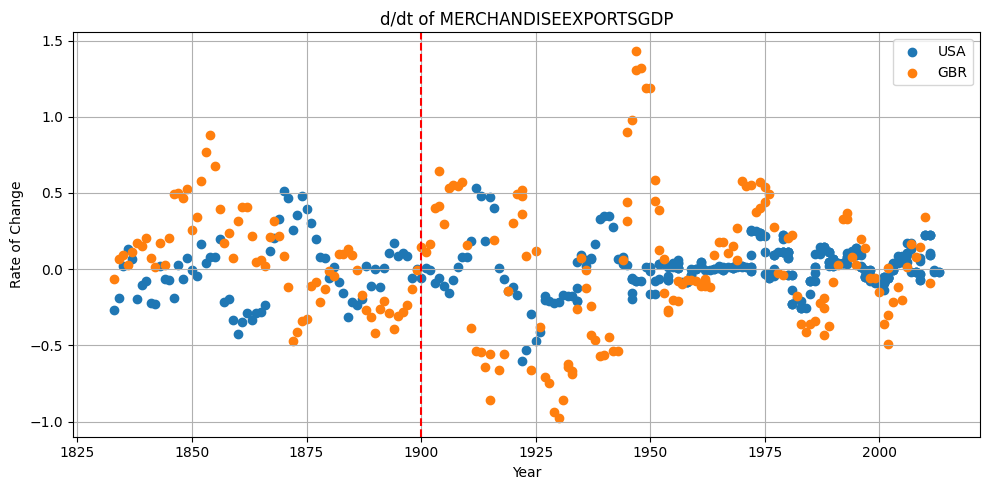

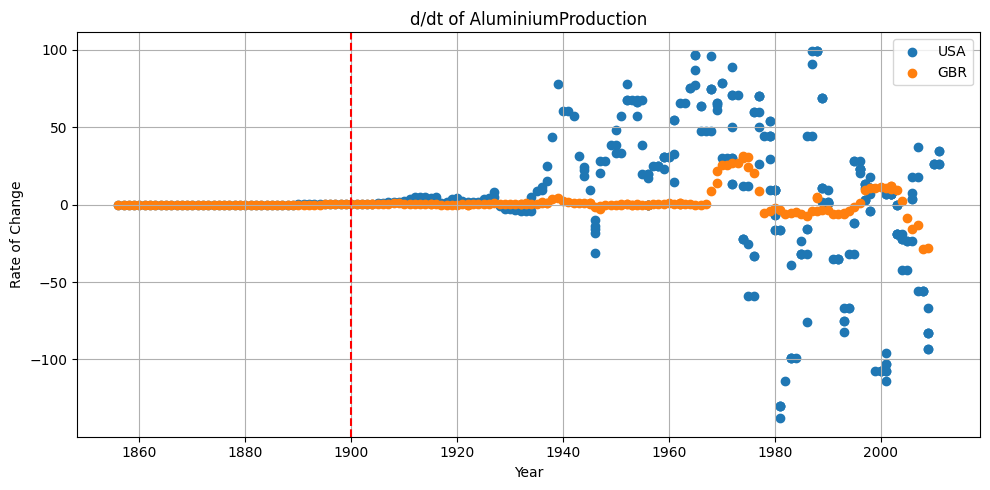

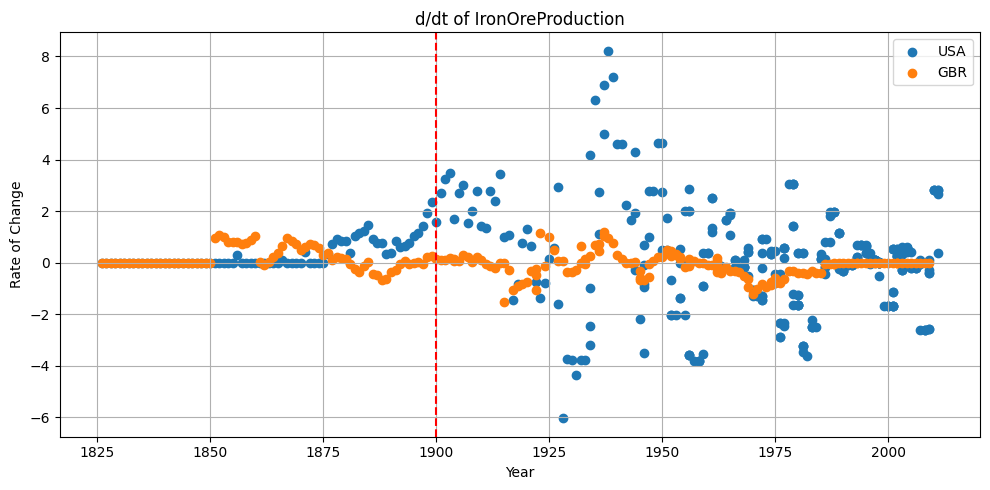

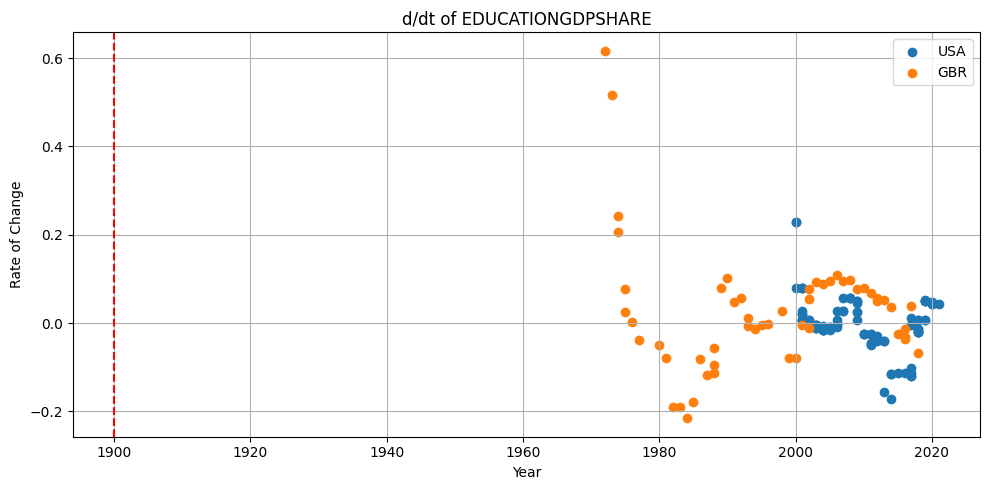

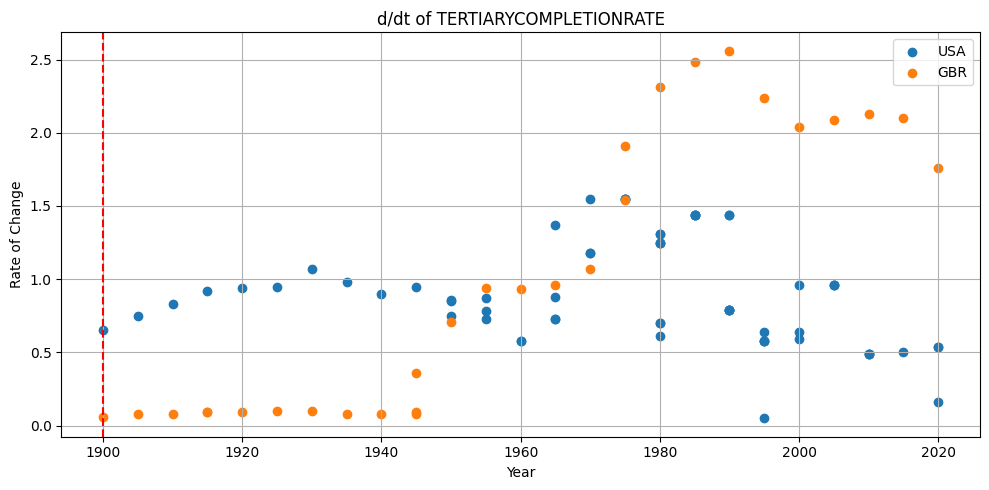

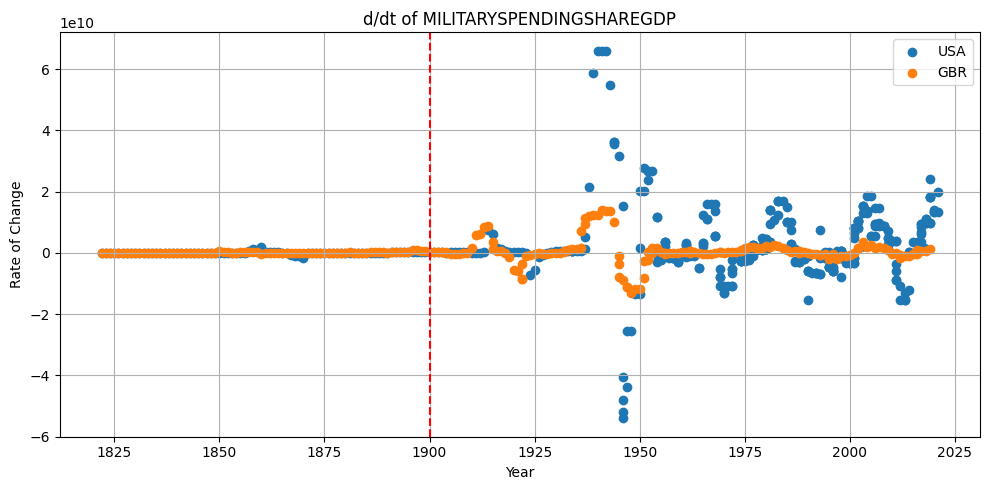

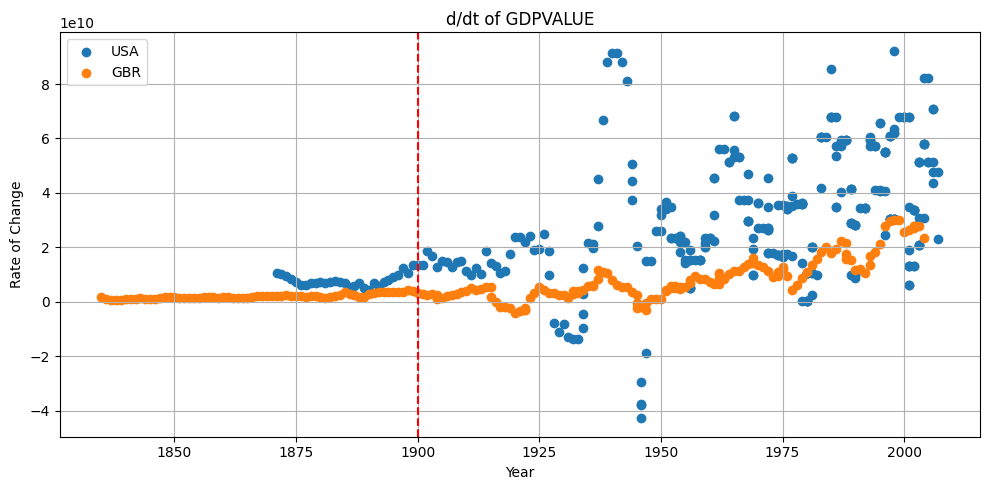

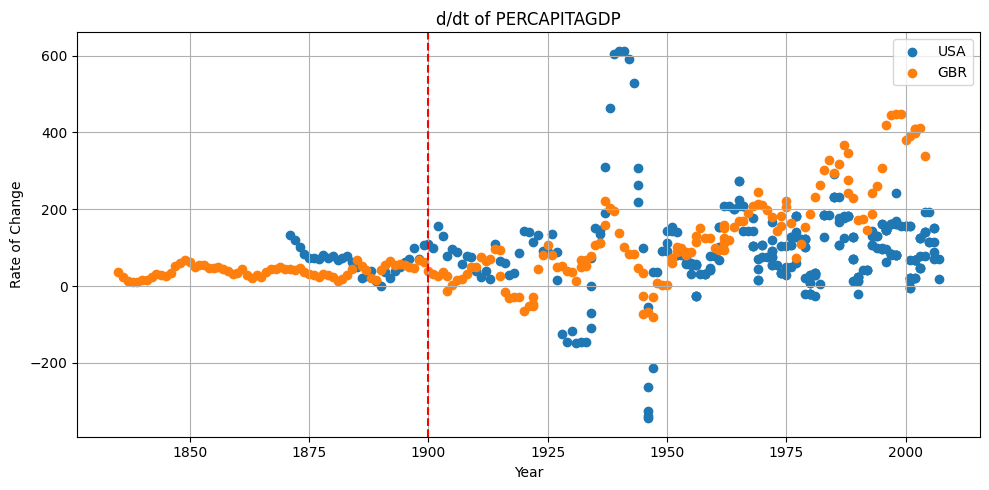

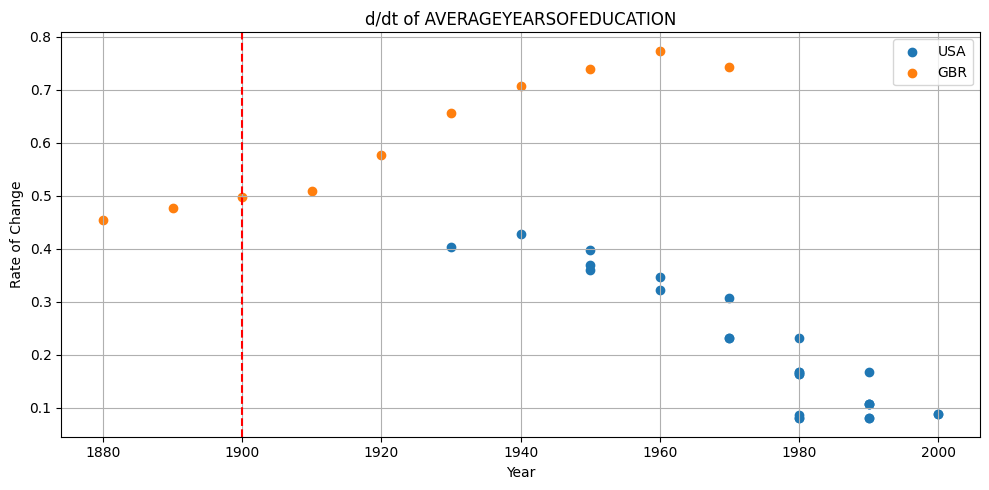

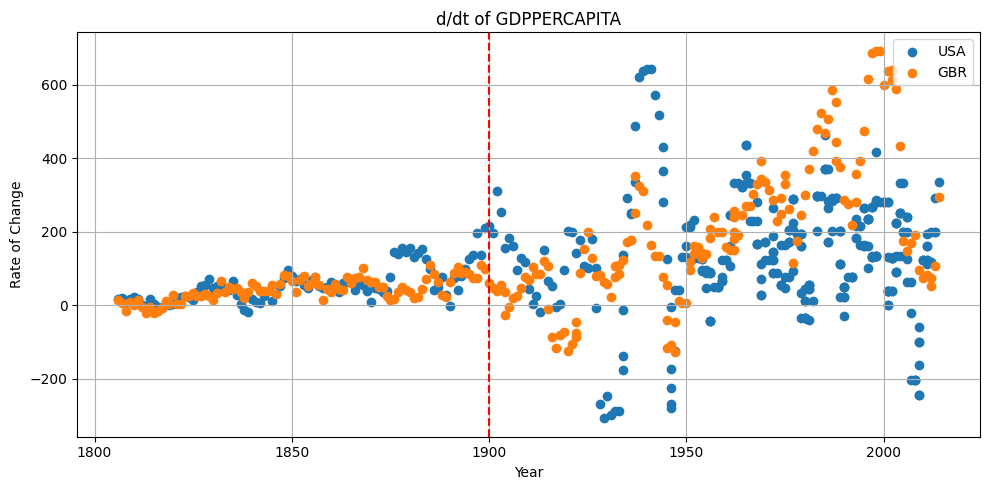

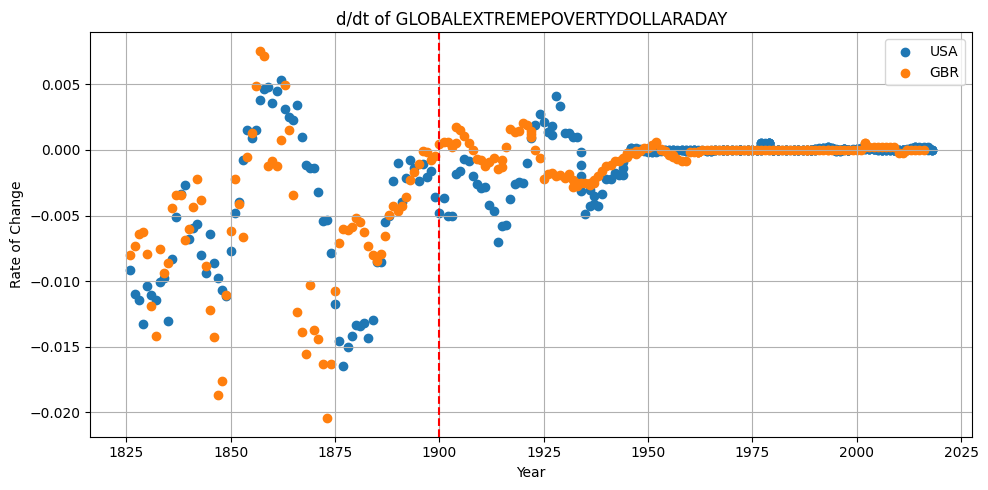

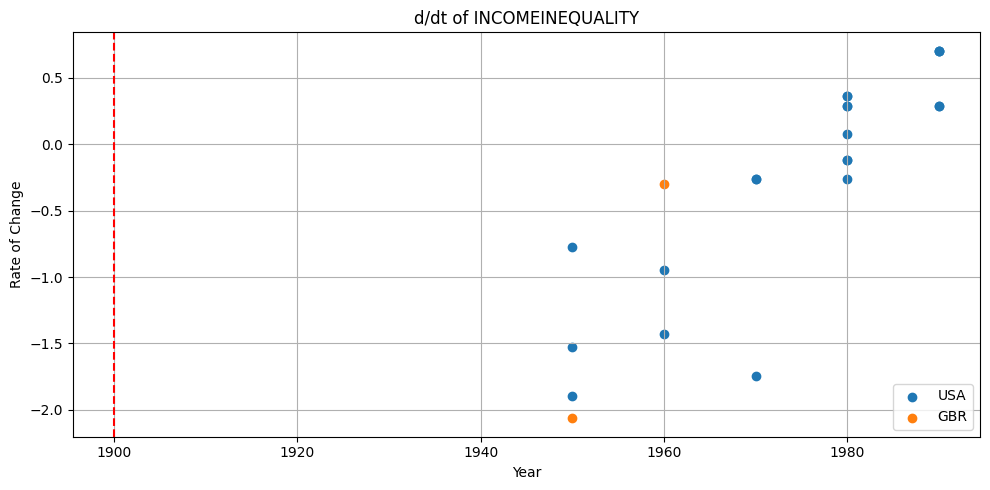

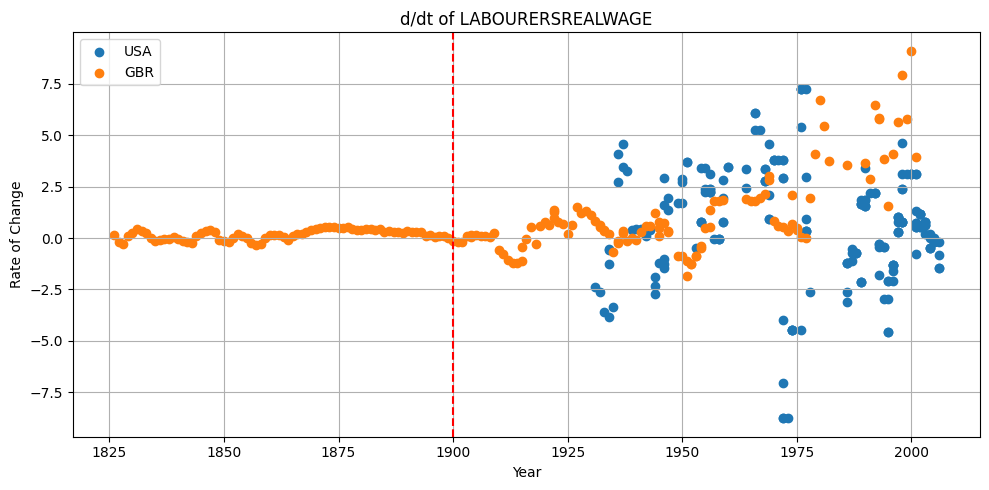

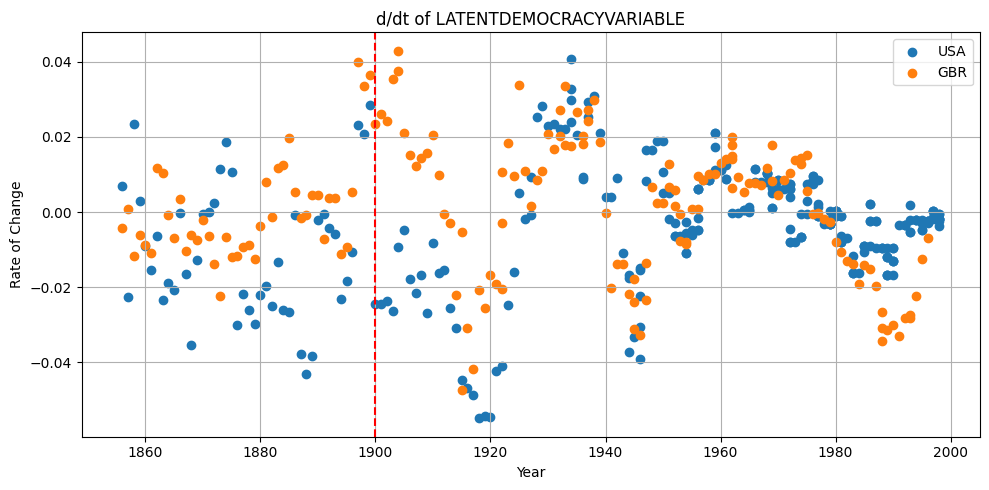

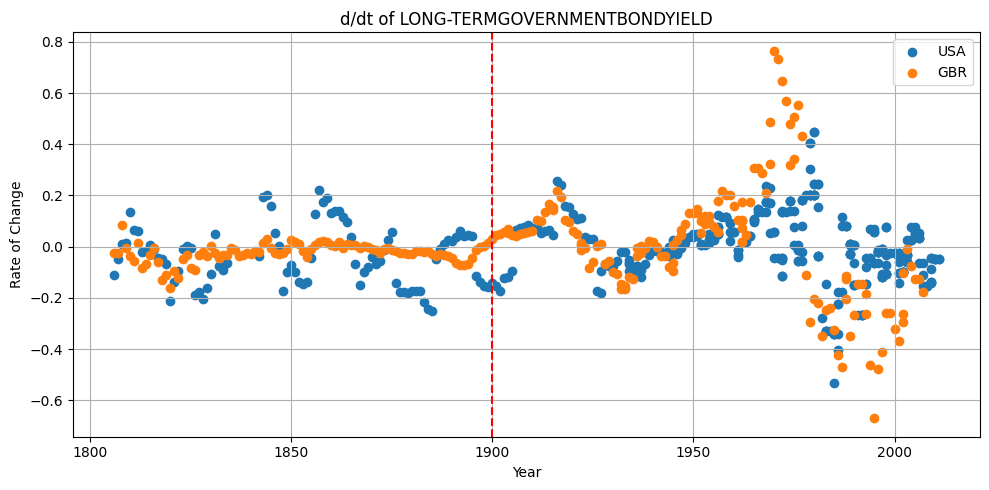

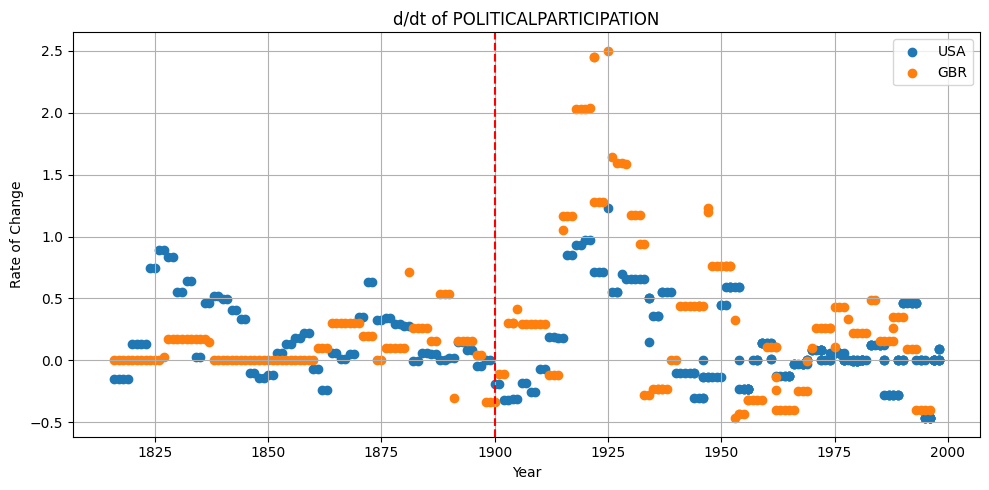

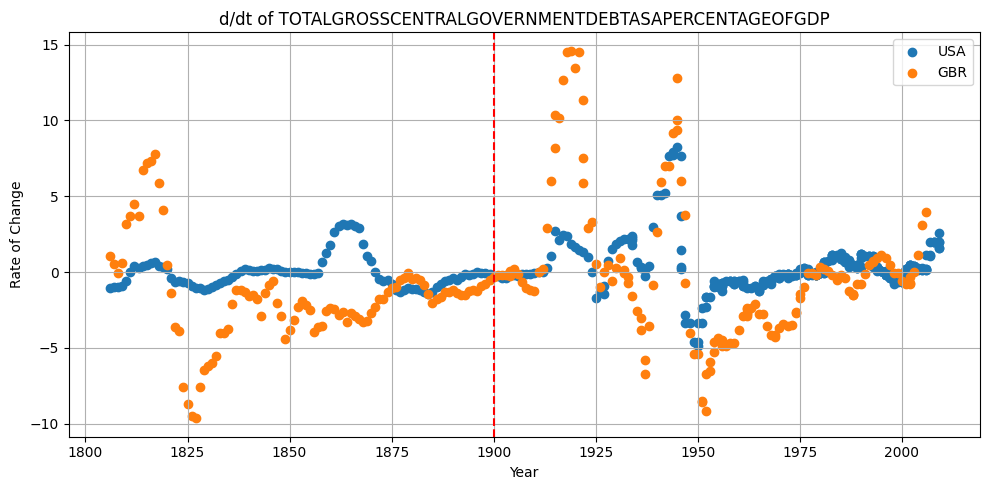

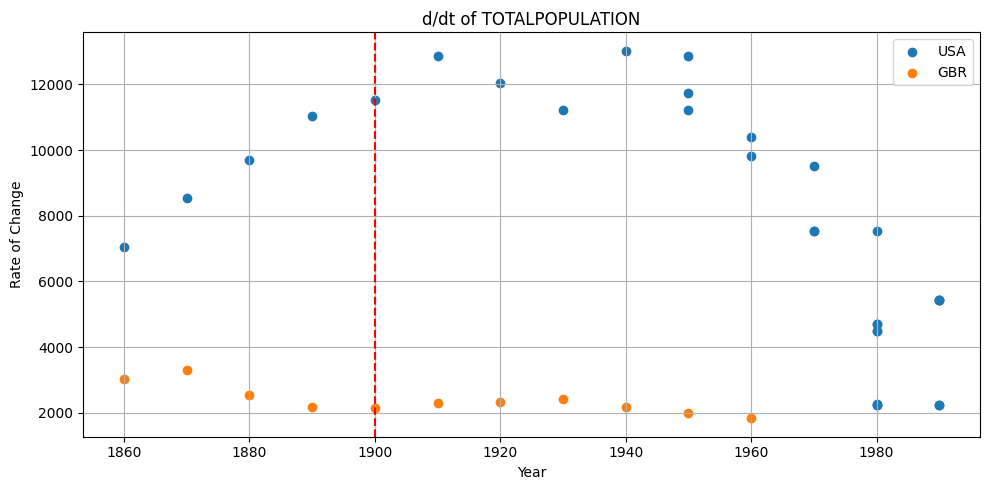

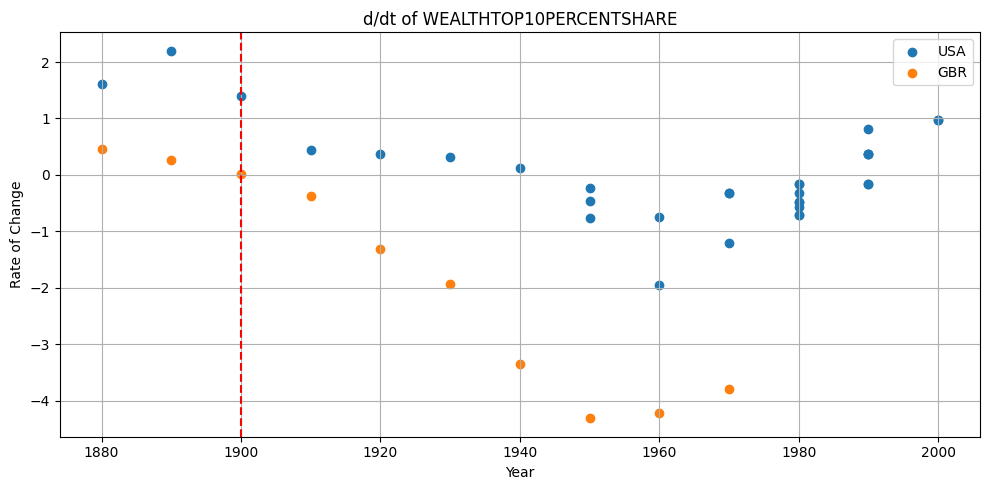

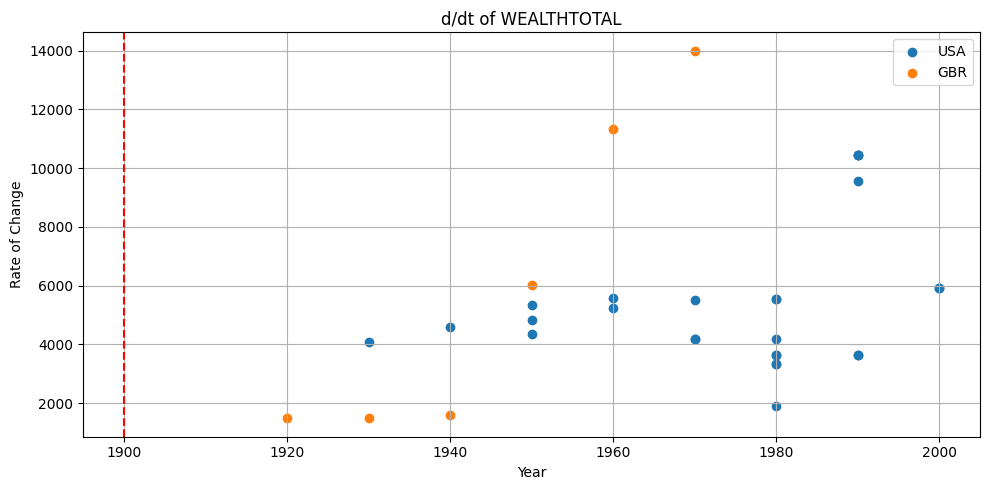

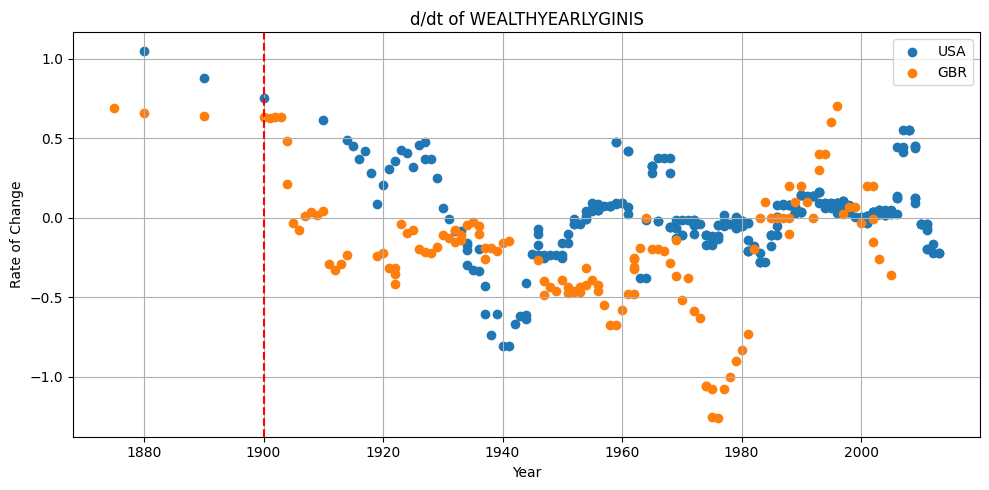

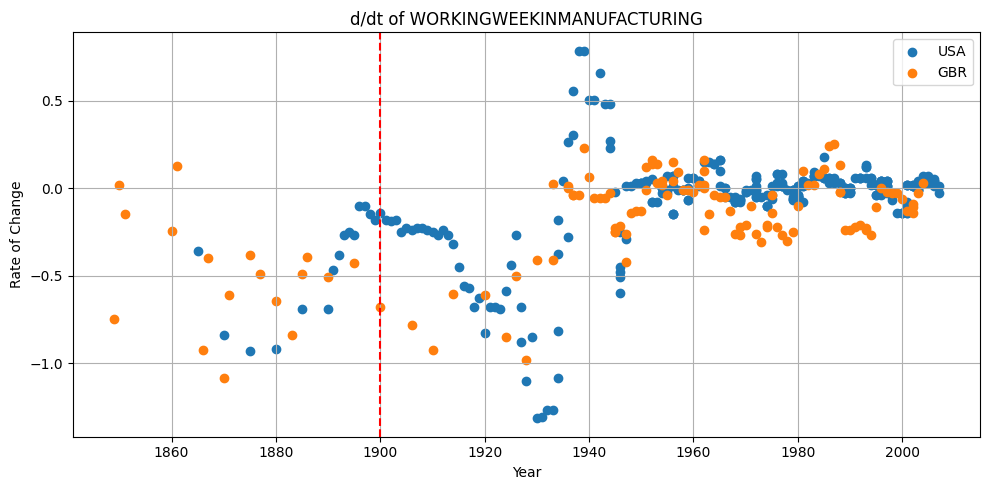

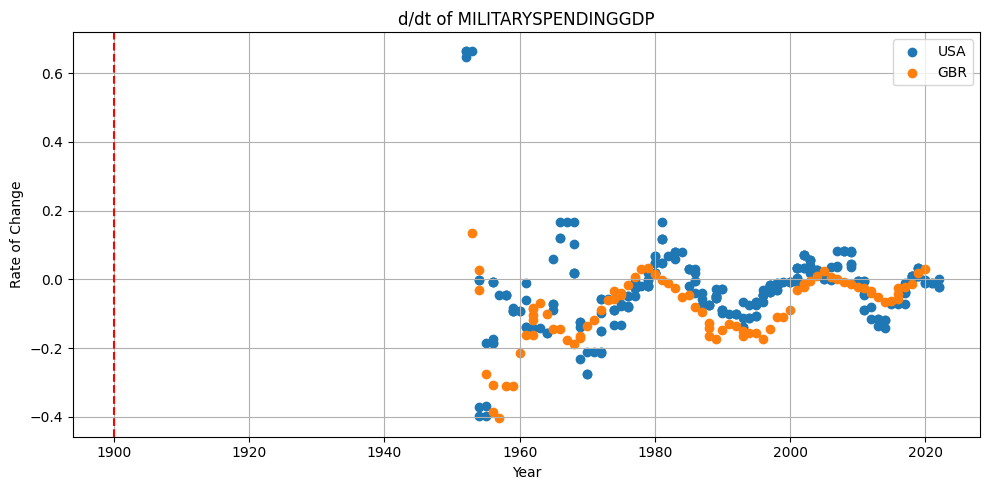

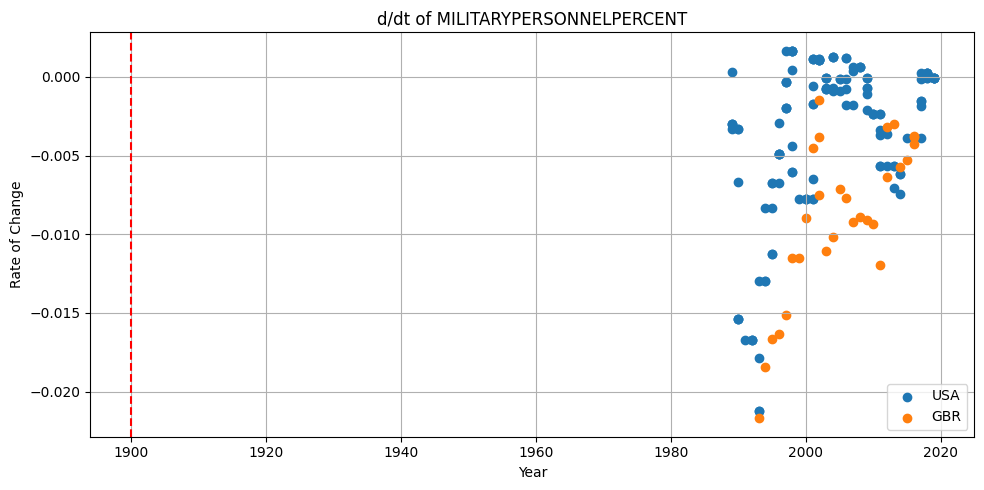

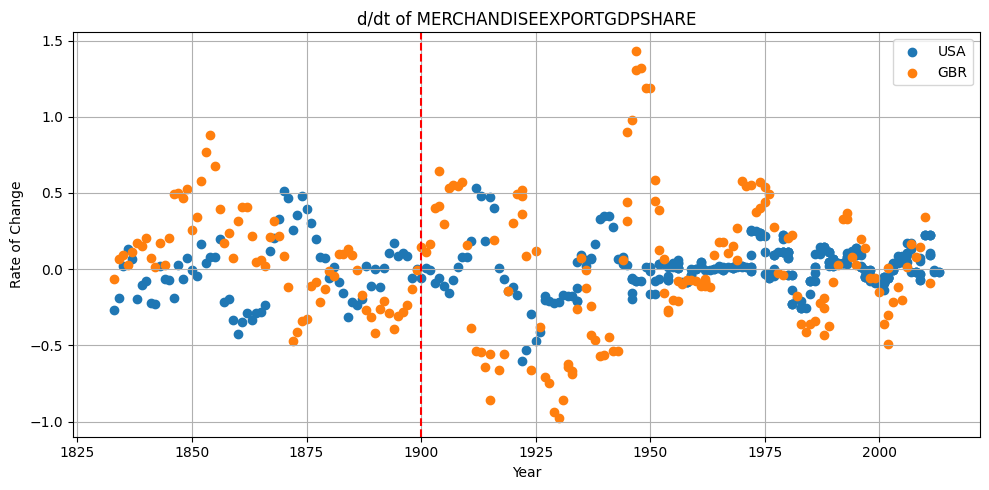

In [40]:
import matplotlib.pyplot as plt

df = merged_df[merged_df['YEAR'] >= 1800]


countries = ['USA', 'GBR']
metrics = [col for col in df.columns if col not in ['COUNTRYCODE', 'YEAR']]

for metric in metrics:
    plt.figure(figsize=(10, 5))

    for country in countries:
        sub = df[df['COUNTRYCODE'] == country][['YEAR', metric]].dropna()
        smoothed = sub[metric].rolling(window=10, center=True).mean()
        derivative = smoothed.diff()
        plt.scatter(sub['YEAR'], derivative, label=country)

    plt.title(f'd/dt of {metric}')
    plt.xlabel('Year')
    plt.ylabel('Rate of Change')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.axvline(x=1900, color='red', linestyle='--', label='Year 1900')
    plt.show()


In [14]:
df.groupby('COUNTRYCODE')['COMPOSITEMEASUREOFWELLBEING']

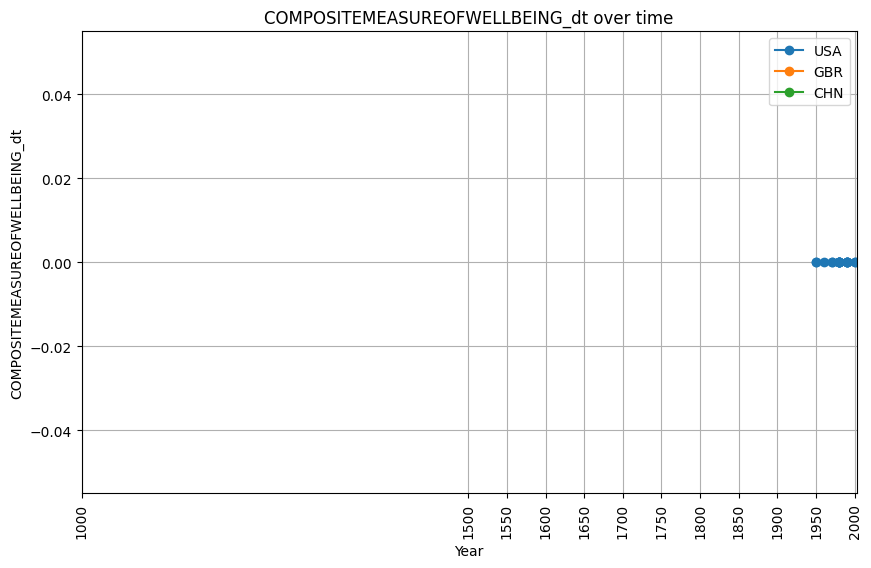

In [15]:
plot_metric(df, ['USA', 'GBR', 'CHN'], 'COMPOSITEMEASUREOFWELLBEING_dt')

In [ ]:
df['METRIC1_smooth'] = df.groupby('COUNTRY')['METRIC1'].transform(
    lambda x: x.rolling(window=5, center=True).mean()
)
df['dMETRIC1_dt'] = df.groupby('COUNTRY')['METRIC1_smooth'].diff()


In [6]:
# SELECTED_COUNTRIES = ["USA", "GBR", "CHN"] #, "RUS", "CHN", "IND", "DEU", "FRA", "JPN", "CHE", "ARG"]

# df_tertiary = pd.read_csv("data/out/owd_education_tertiary_completion_rate.csv")
# df_gpd_edu = pd.read_csv("data/out/owd_education_government_expenditure_gdp.csv")
# df_nobel = pd.read_csv("data/out/nobel_laureates.csv")
# df_patents = pd.read_csv("data/out/wipo_patents.csv")
# df_clio = pd.read_csv("data/out/all_clio_data.csv")


# # df_clio = df_clio.loc[:, ~df_clio.columns.str.contains('^Unnamed')]

# merged_df = pd.merge(df_tertiary, df_gpd_edu, on=["YEAR", "COUNTRYCODE"], how="outer")
# merged_df = pd.merge(merged_df, df_nobel, on=["YEAR", "COUNTRYCODE"], how="outer")
# merged_df = pd.merge(merged_df, df_patents, on=["YEAR", "COUNTRYCODE"], how="outer")
# merged_df = pd.merge(merged_df, df_clio, on=["YEAR", "COUNTRYCODE"], how="outer")


# # merged_df.fillna(0, inplace=True)
# merged_df


# # duplicates = merged_df.groupby(['YEAR', 'COUNTRYCODE']).size().reset_index(name='count')
# # duplicates = duplicates[duplicates['count'] > 1]
# # print(duplicates)

# # merged_df[(merged_df['YEAR'] == 1884) & (merged_df['COUNTRYCODE'] == 'BEL')]



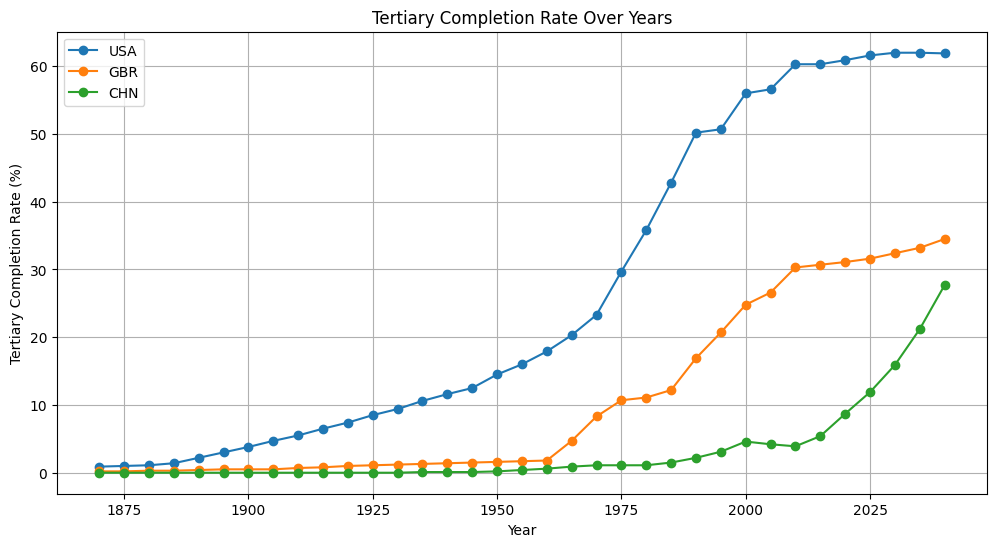

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for country in SELECTED_COUNTRIES:
    country_data = df_tertiary[df_tertiary['COUNTRYCODE'] == country]
    plt.plot(country_data['YEAR'], country_data['TERTIARYCOMPLETIONRATE'], label=country, marker='o')

plt.title('Tertiary Completion Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Tertiary Completion Rate (%)')
plt.legend()
plt.grid()
plt.show()


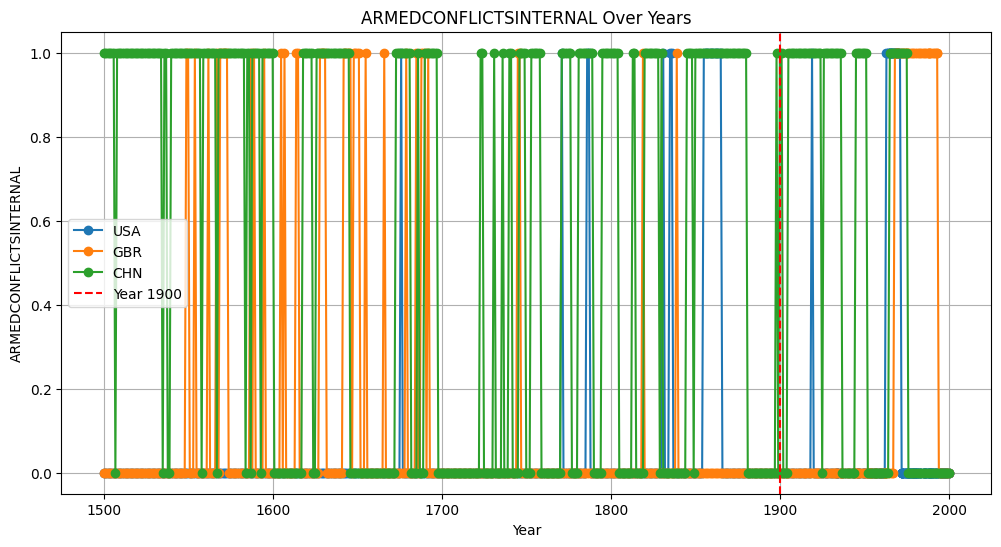

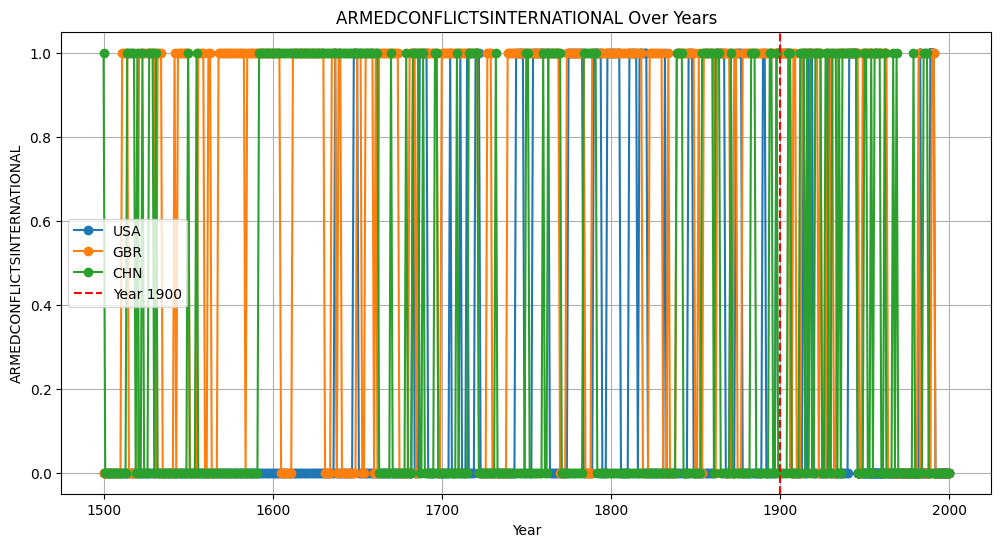

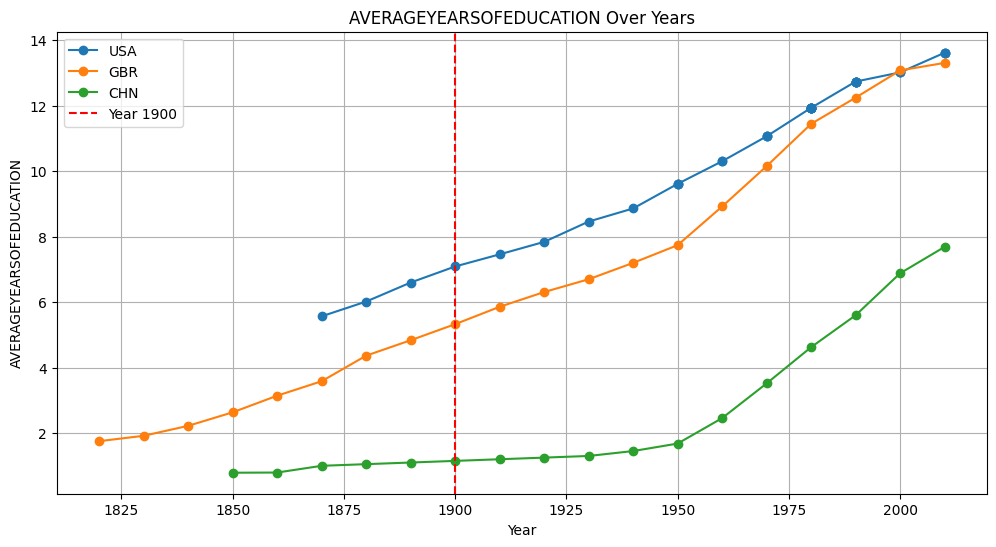

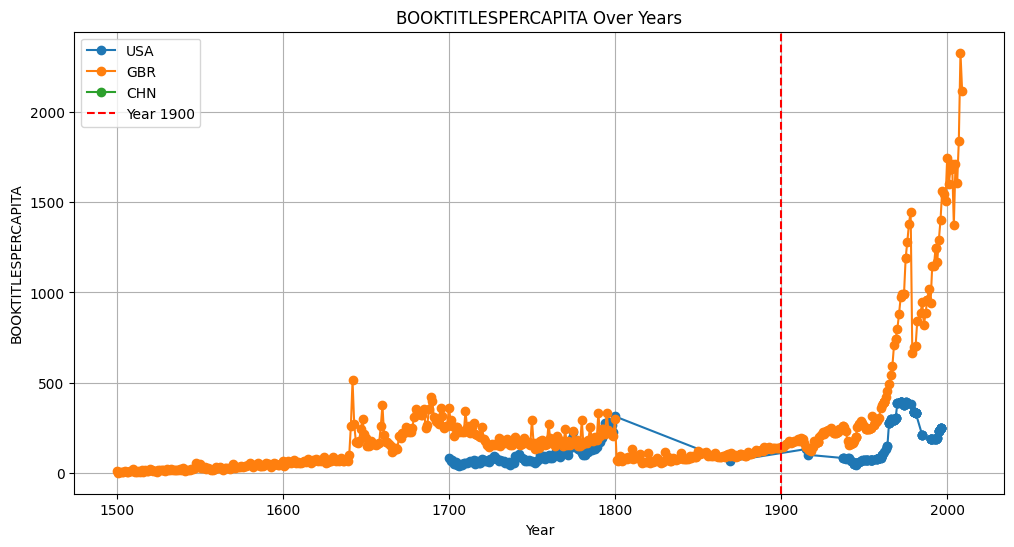

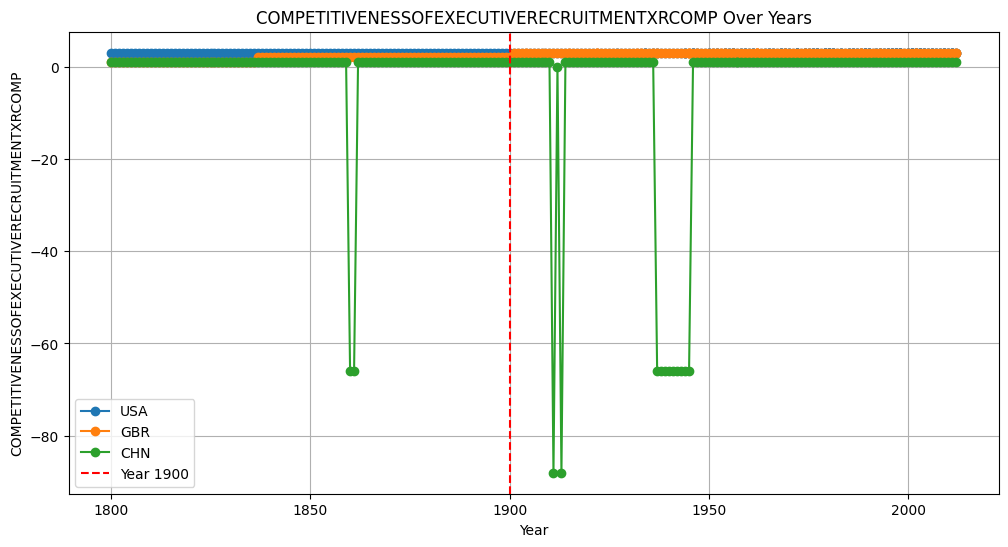

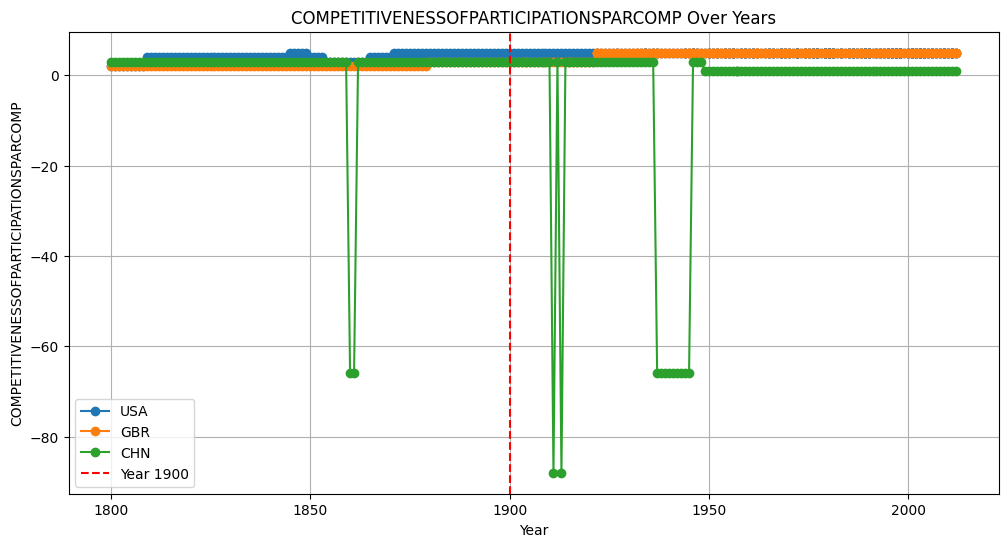

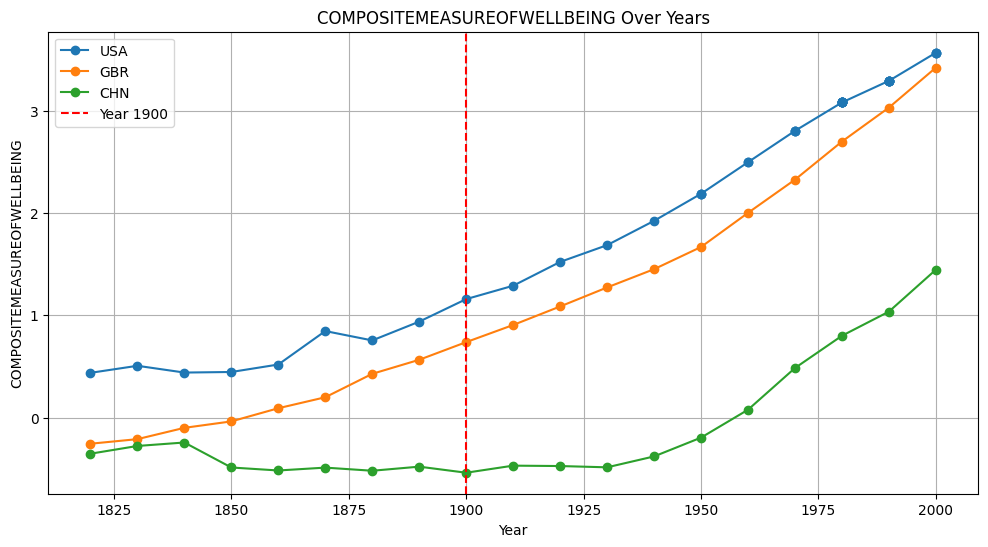

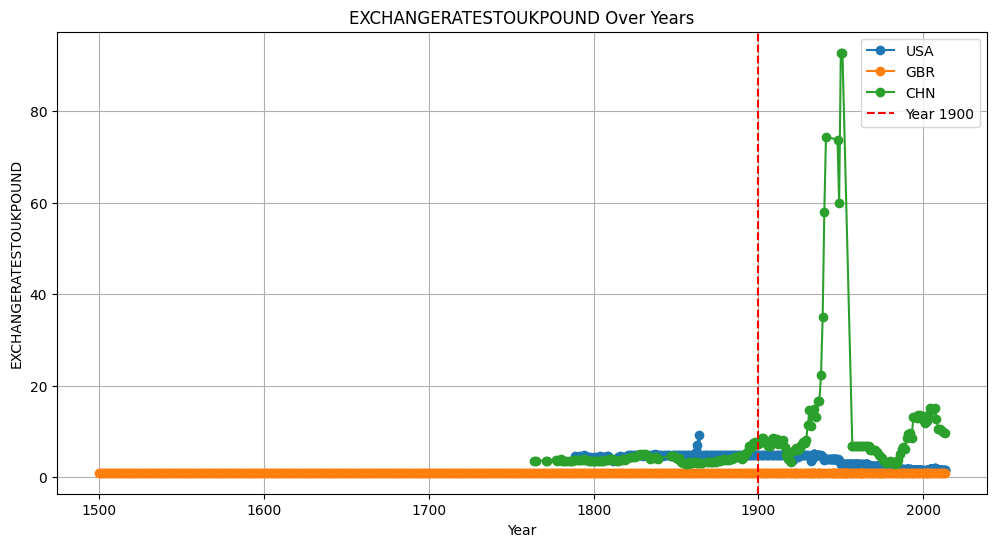

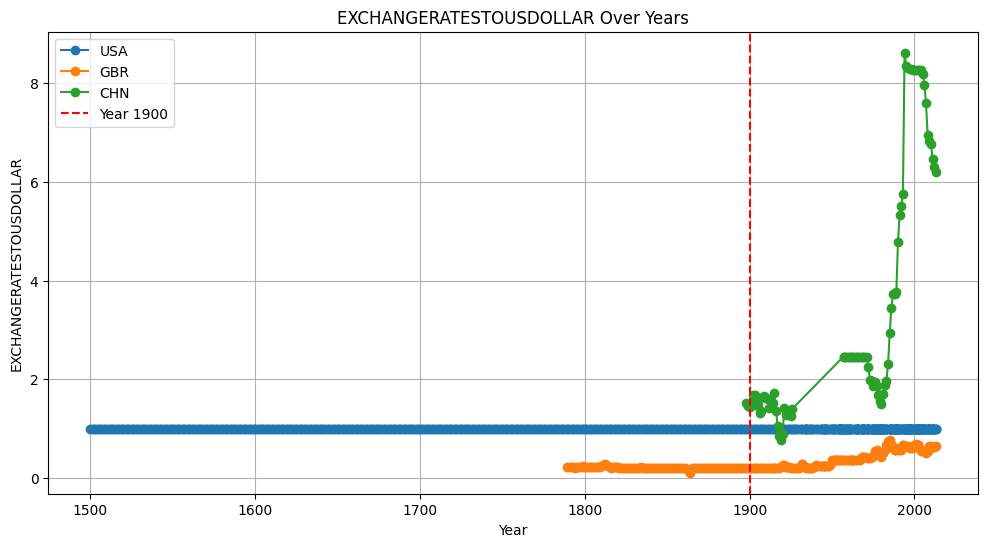

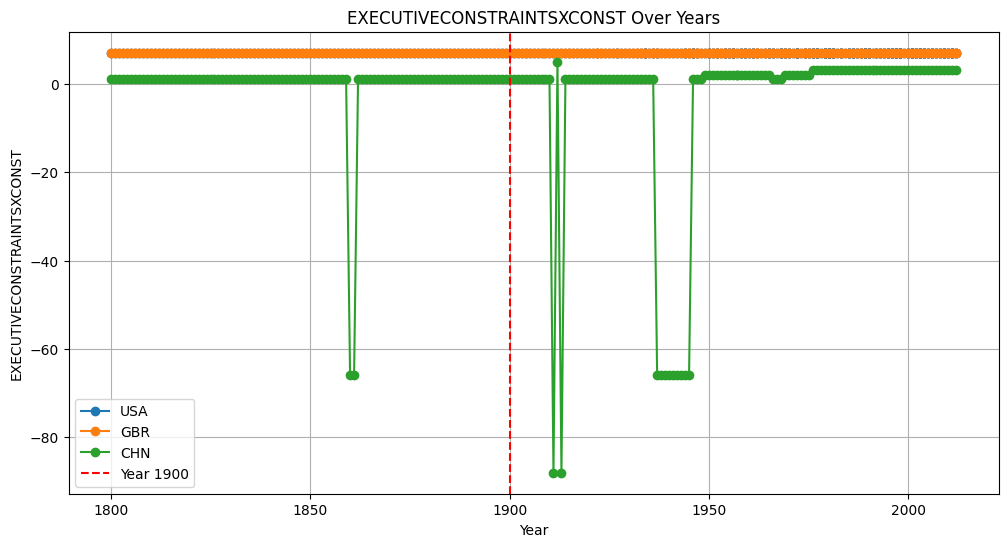

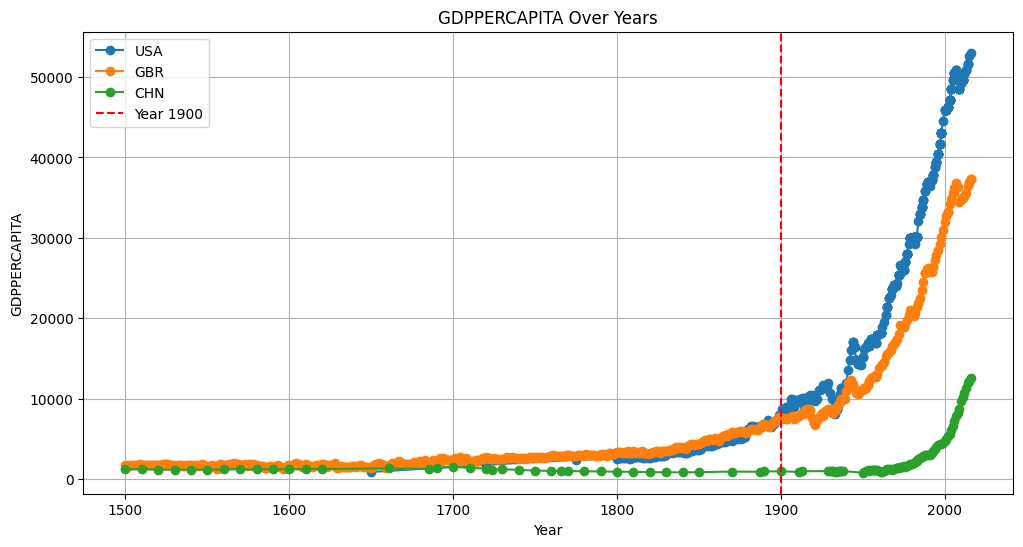

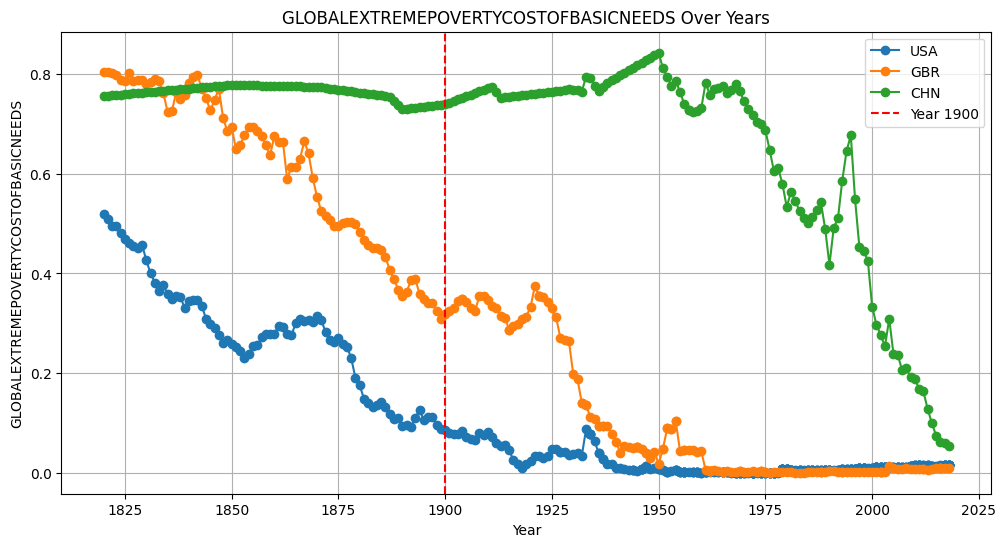

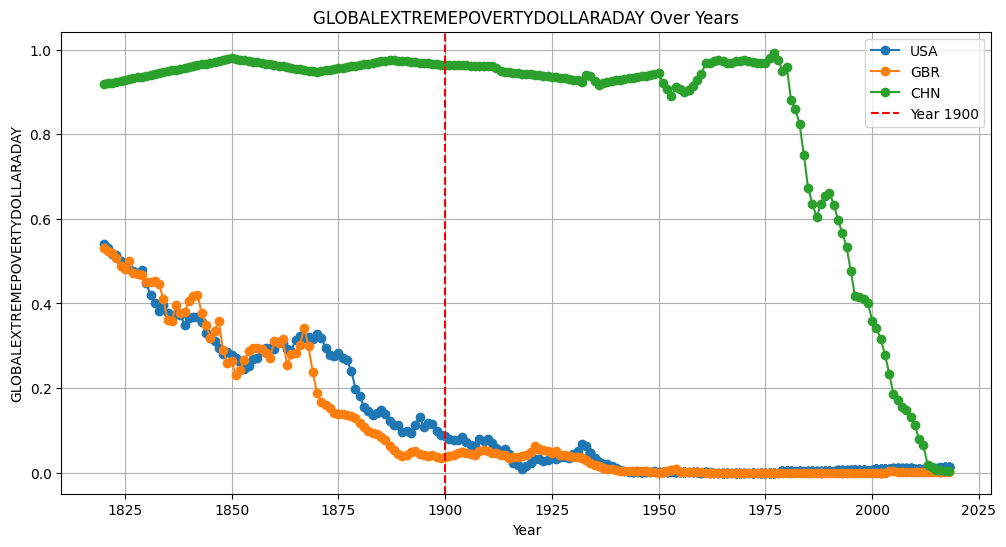

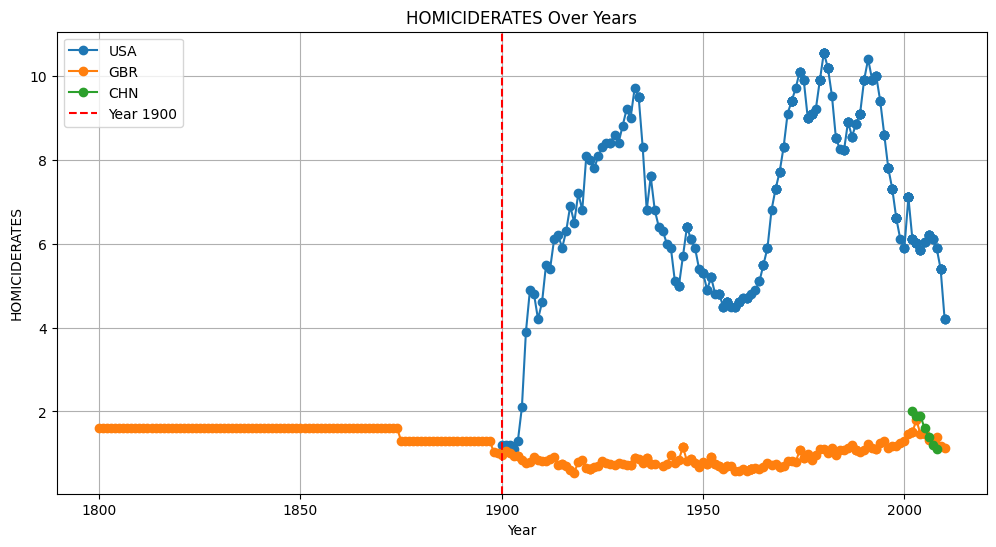

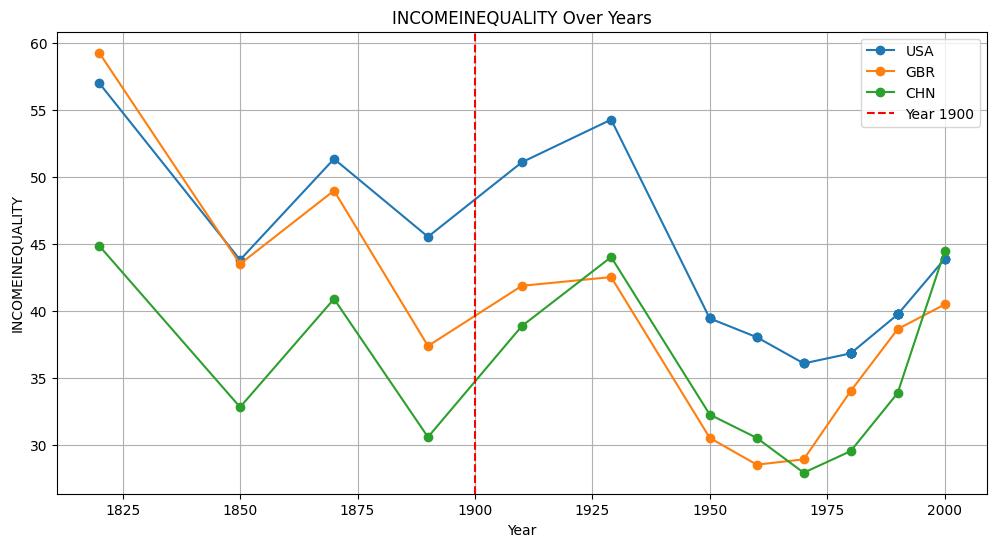

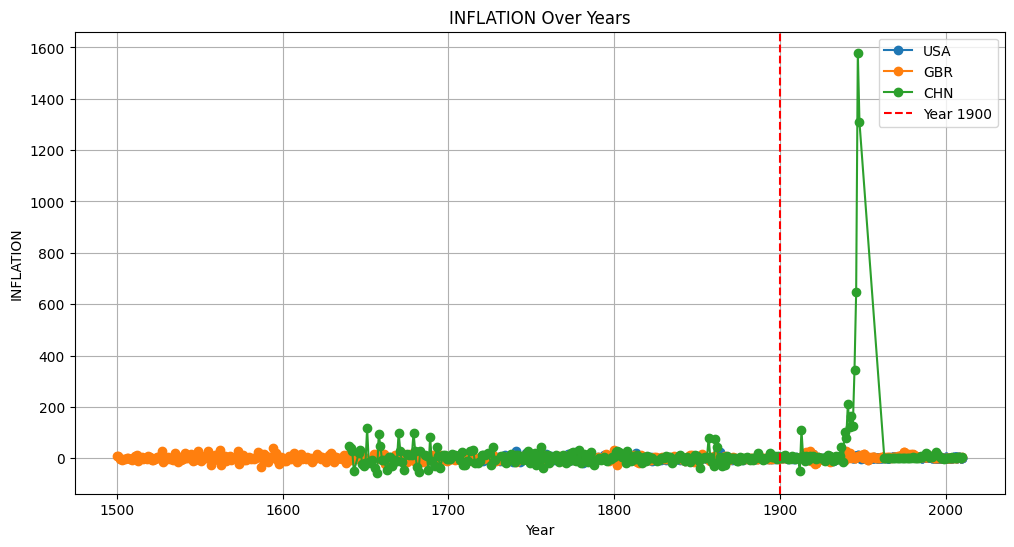

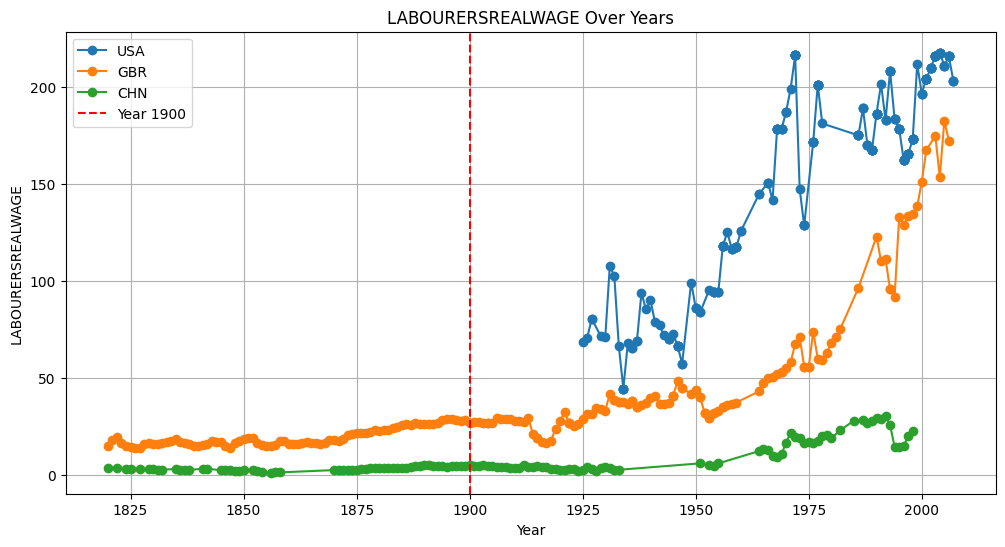

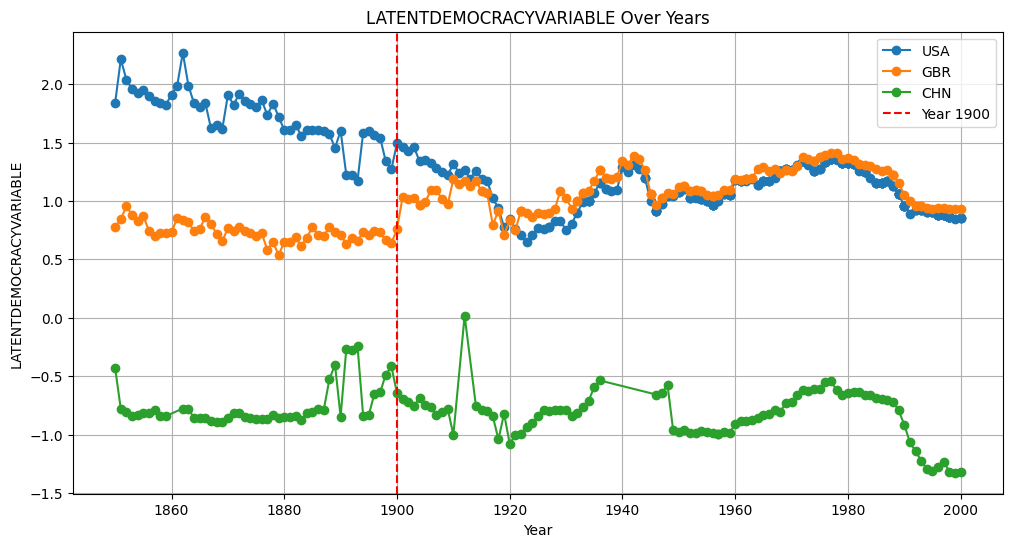

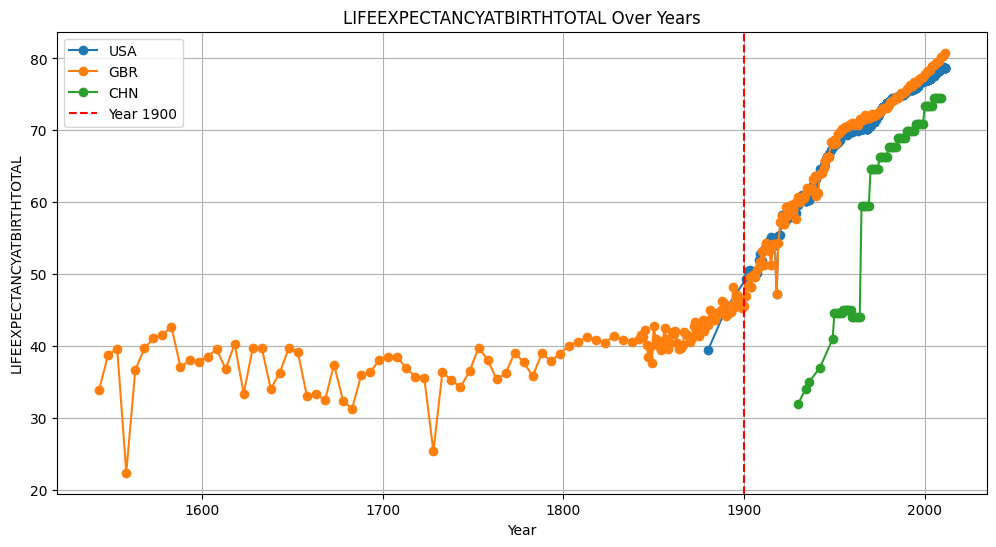

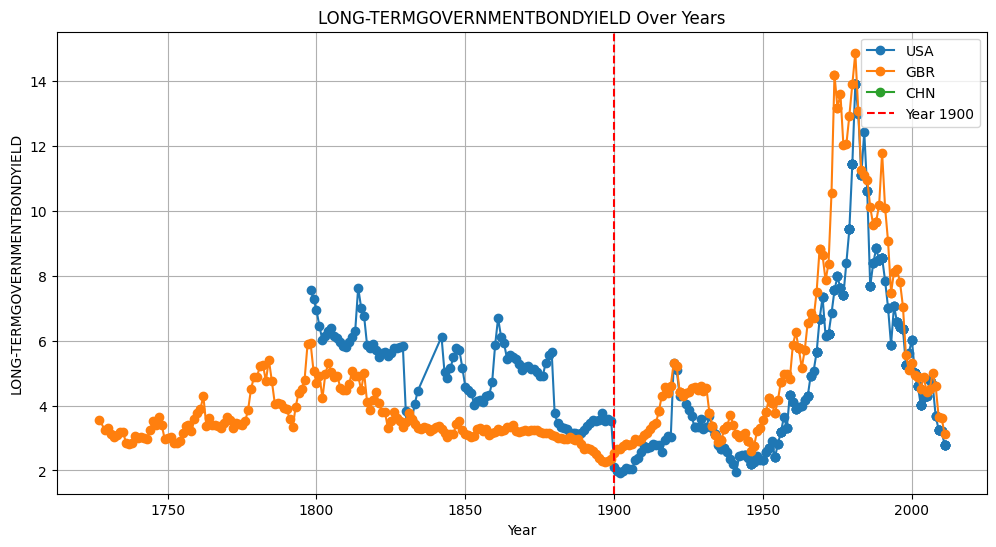

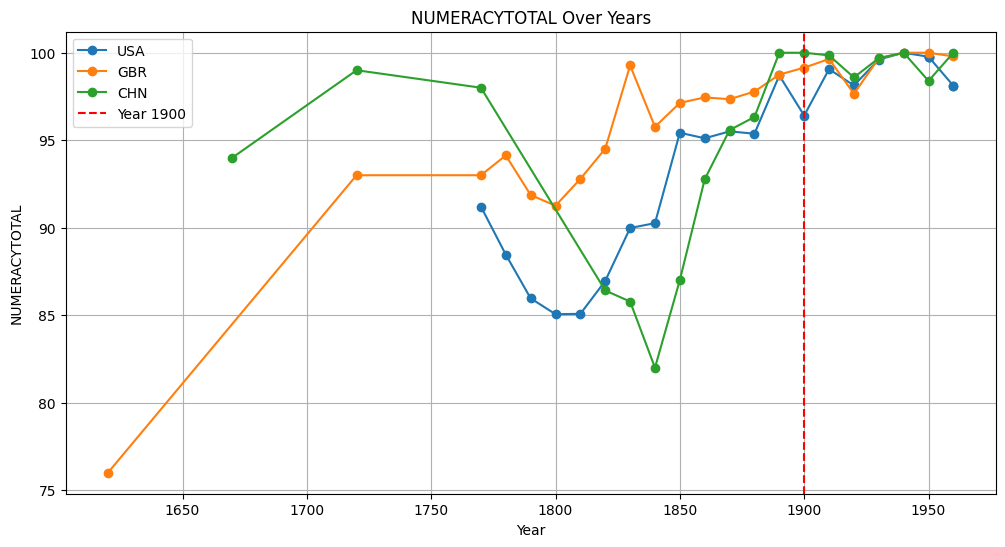

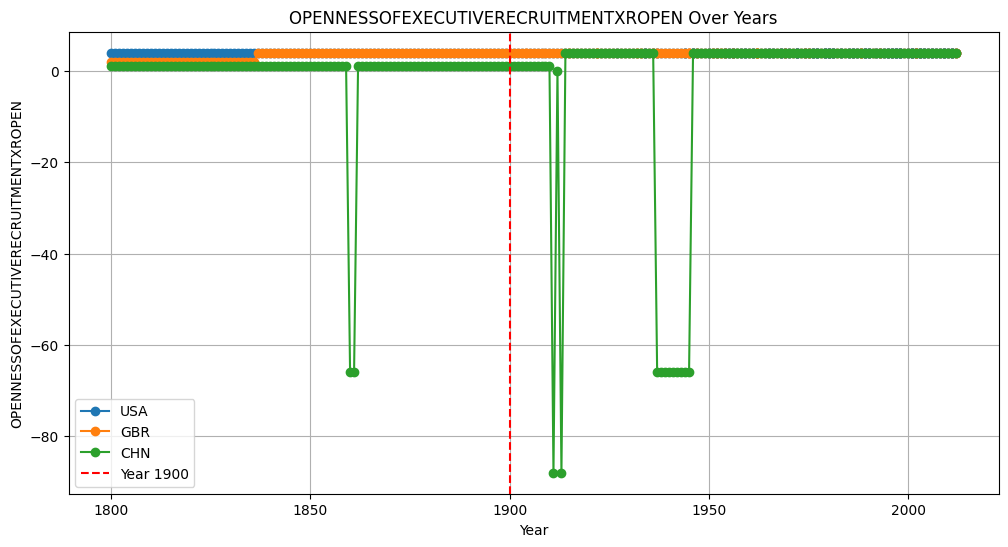

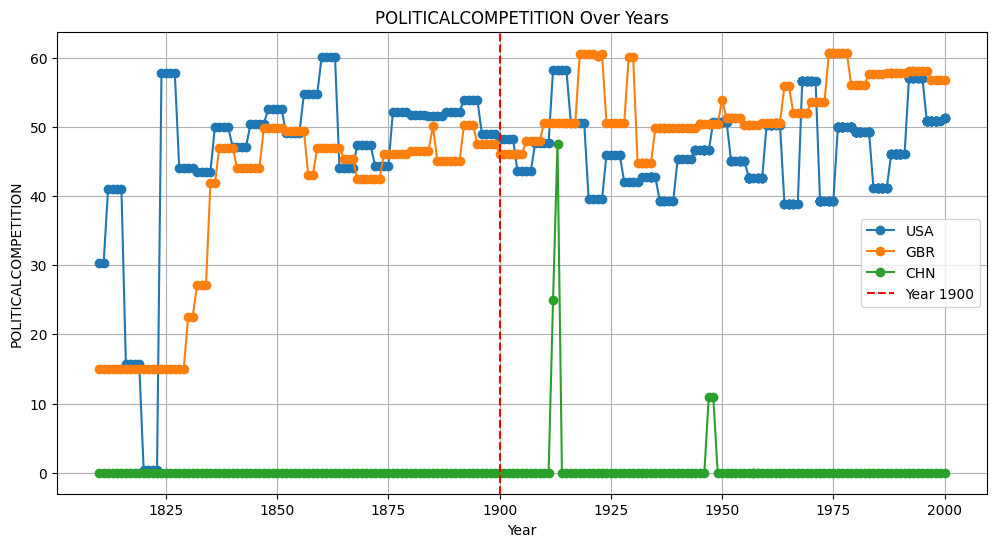

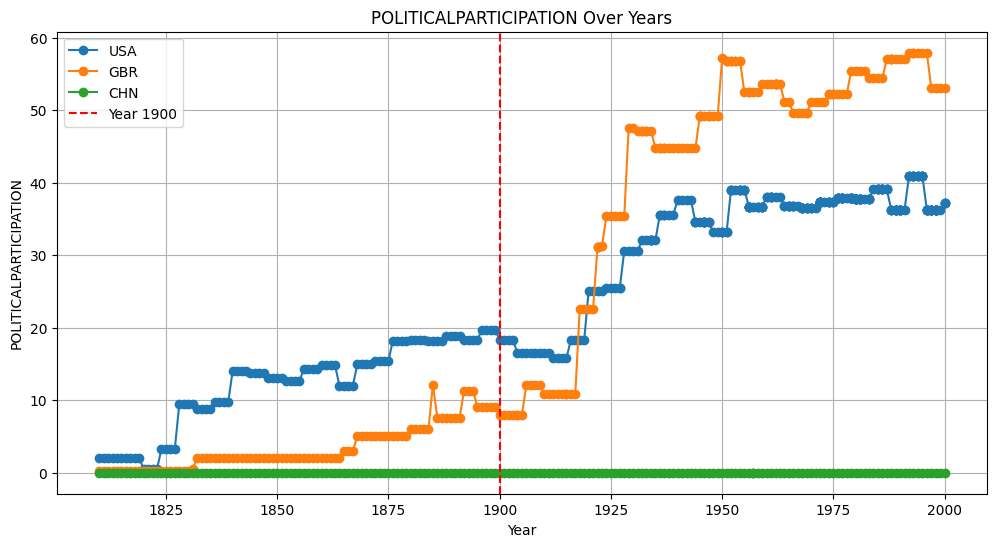

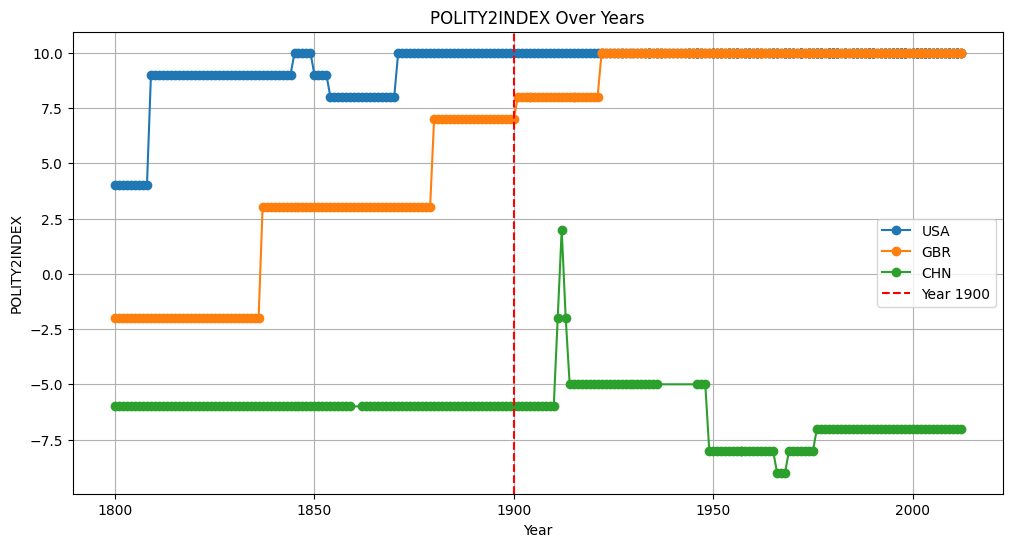

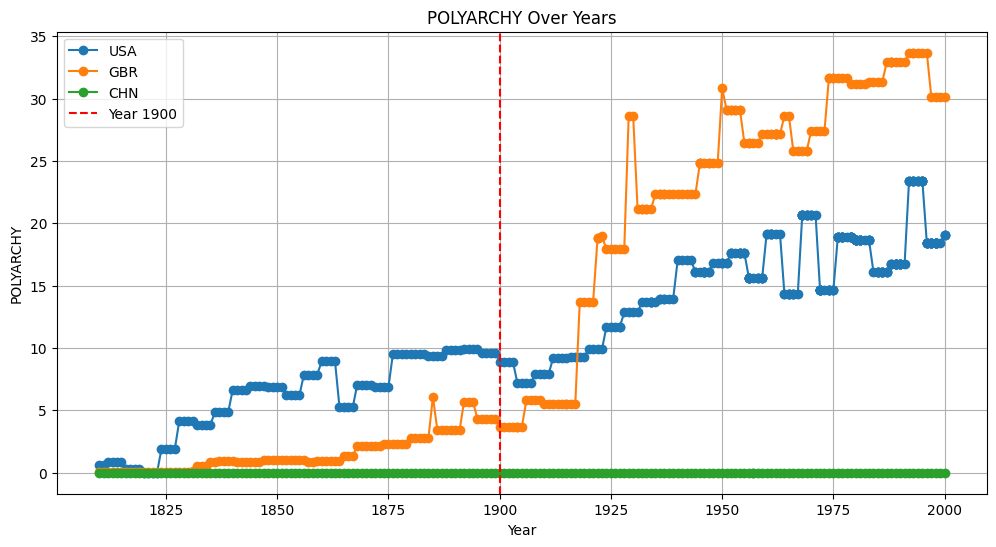

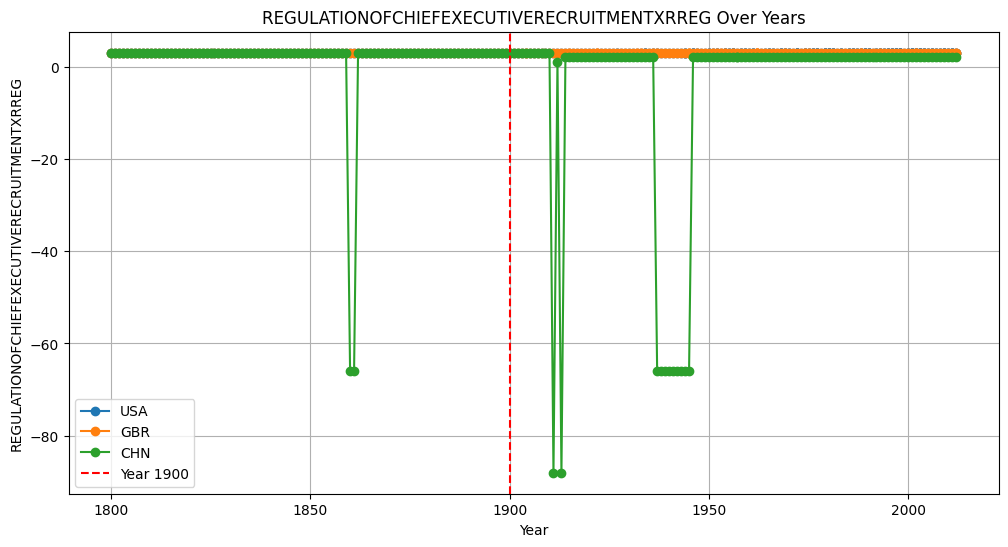

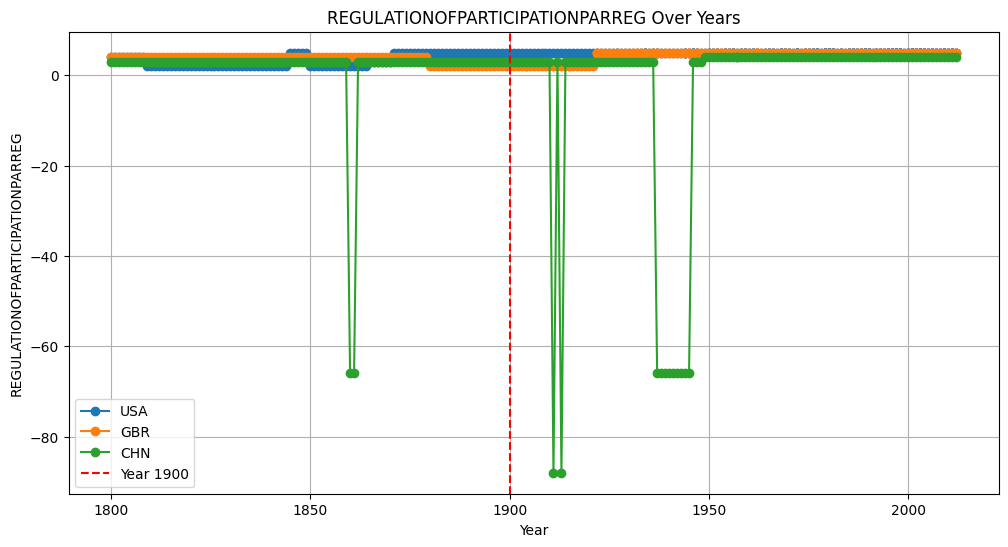

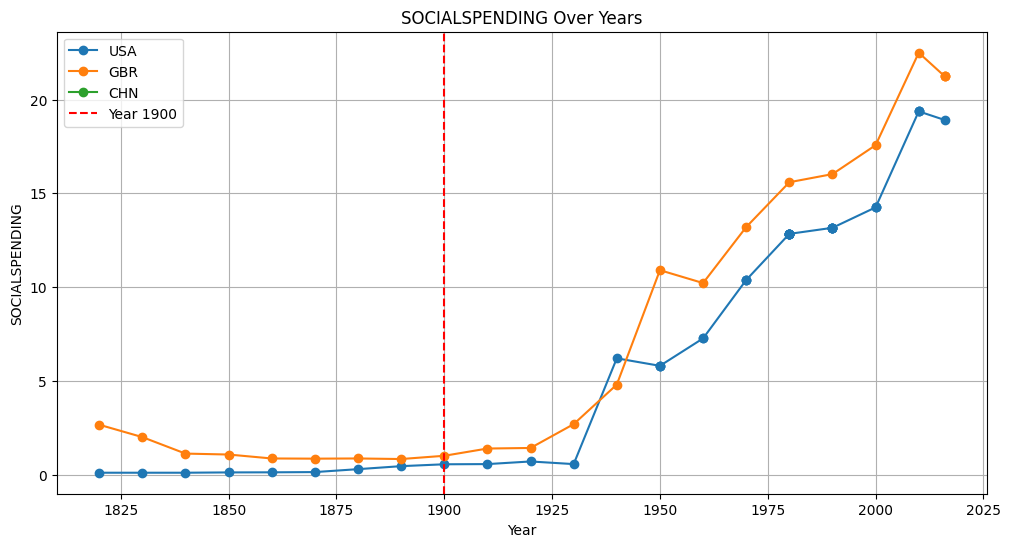

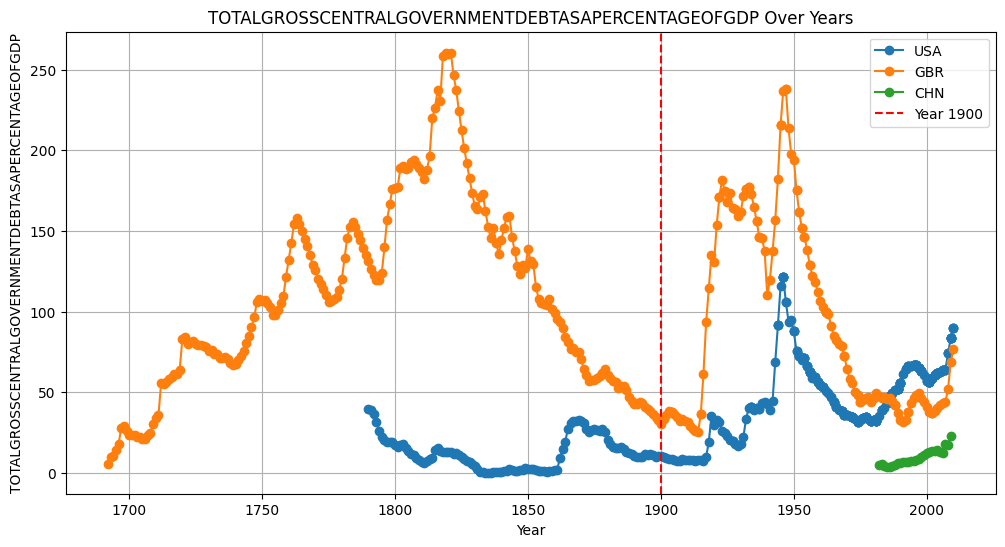

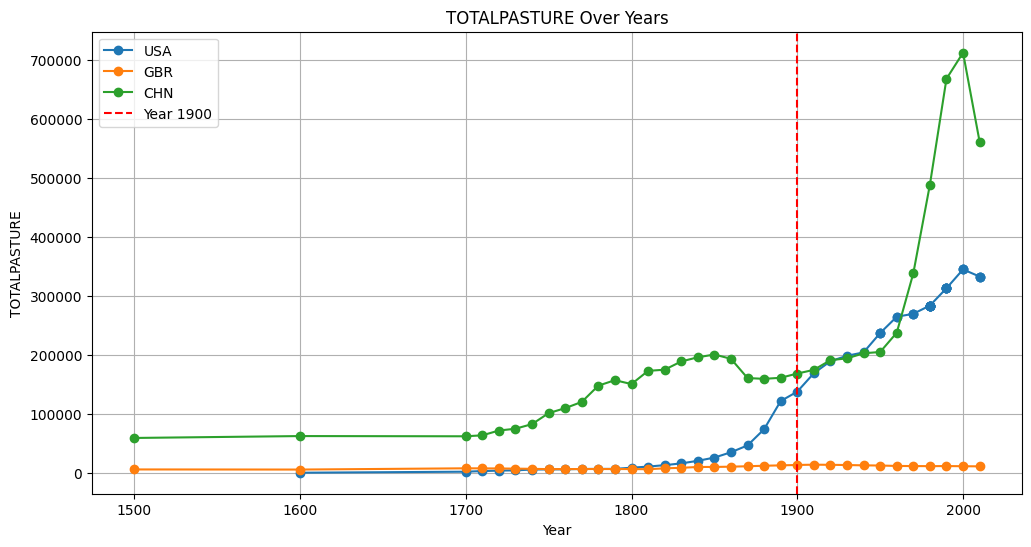

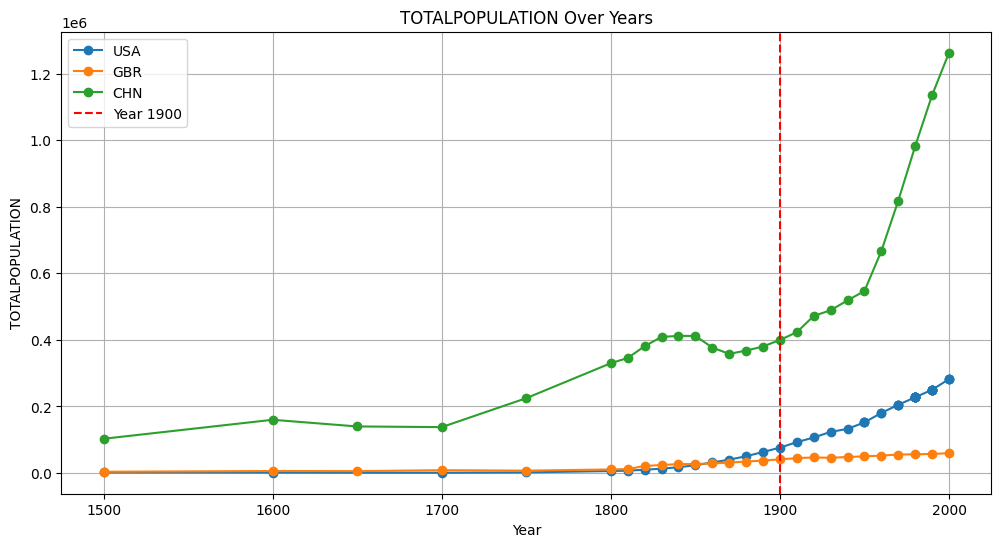

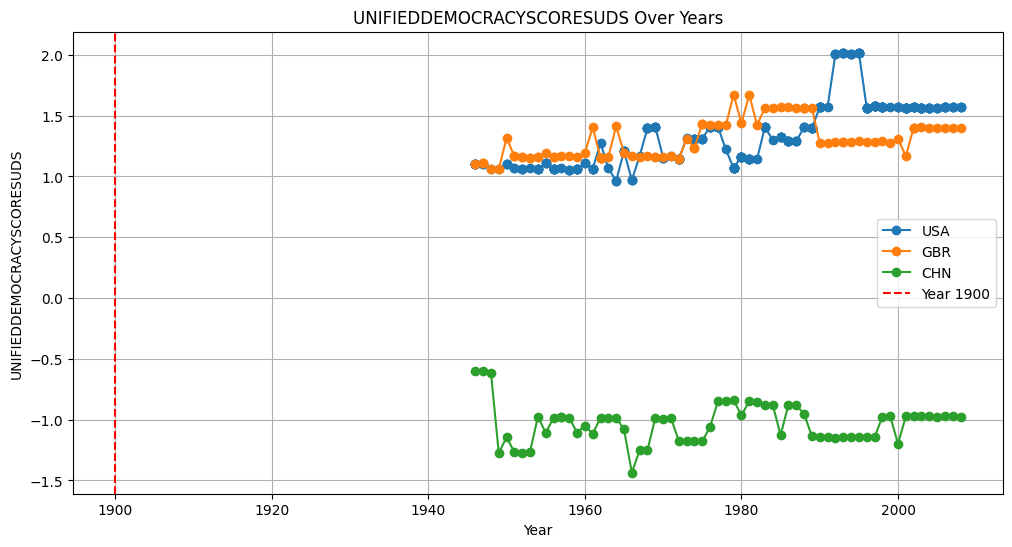

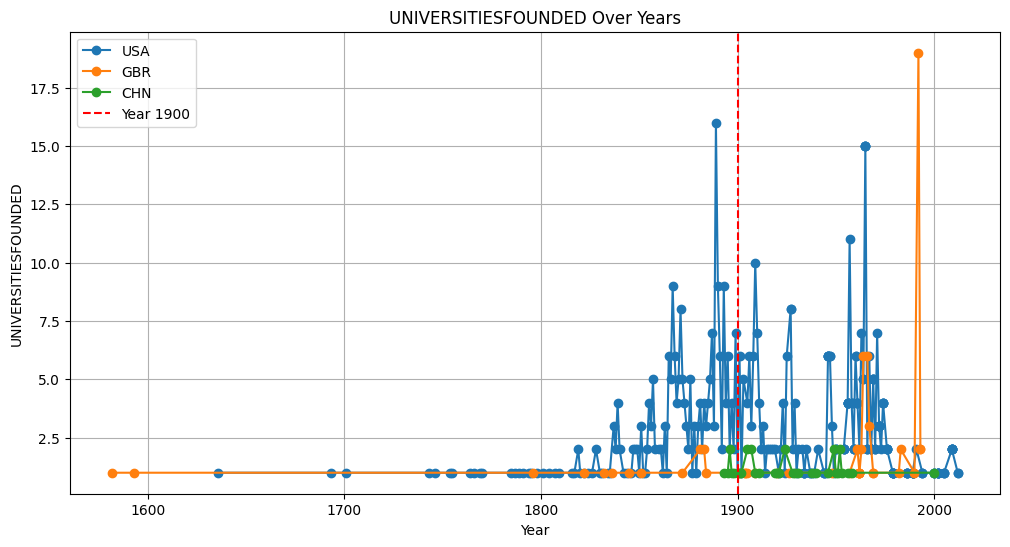

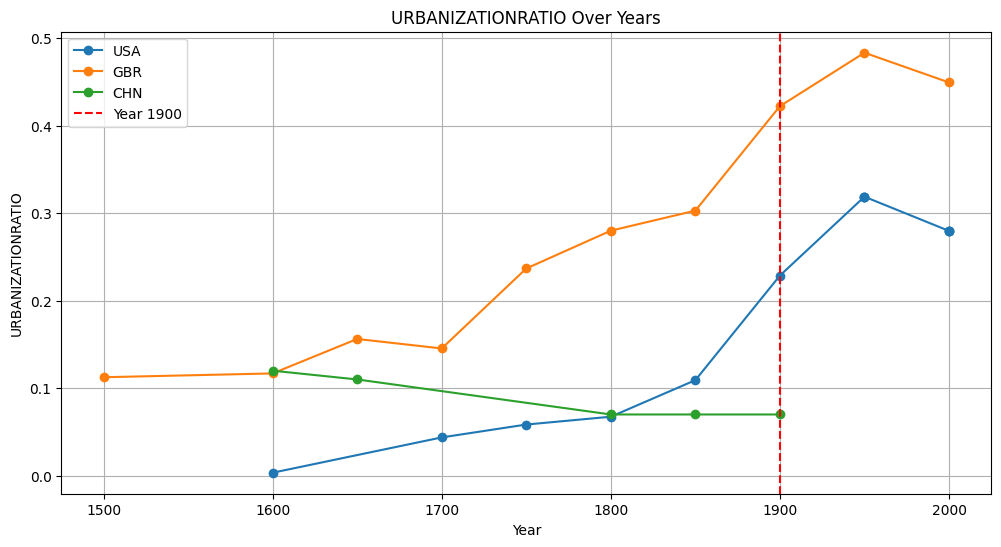

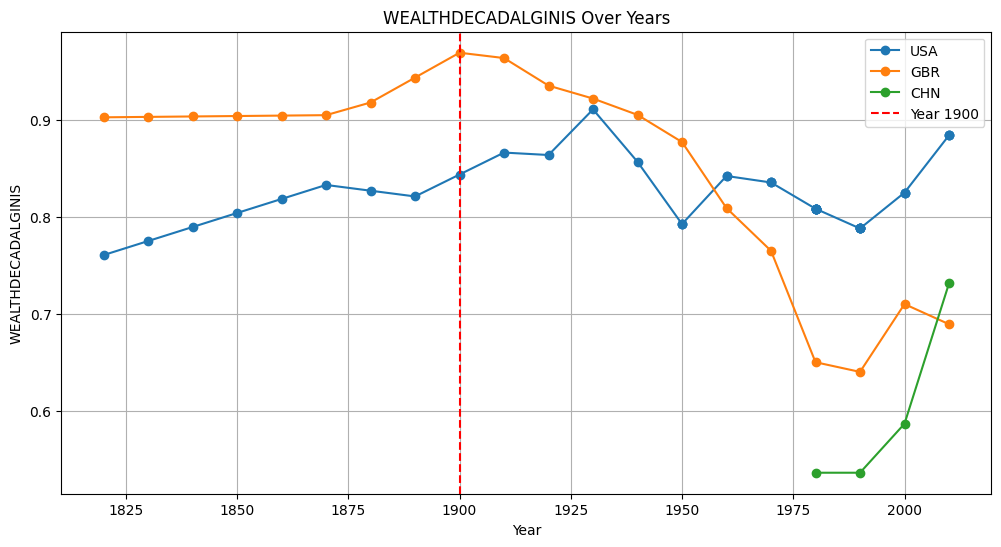

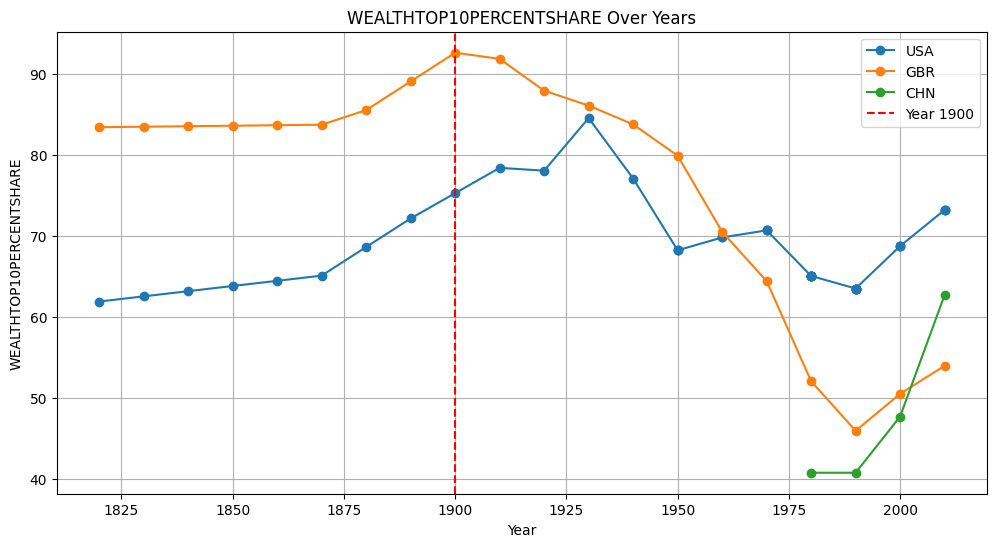

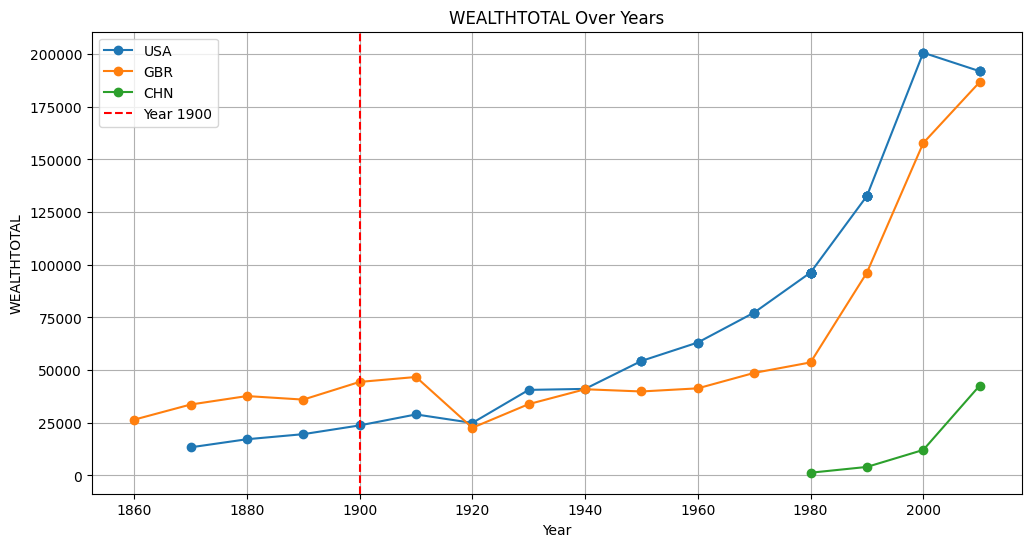

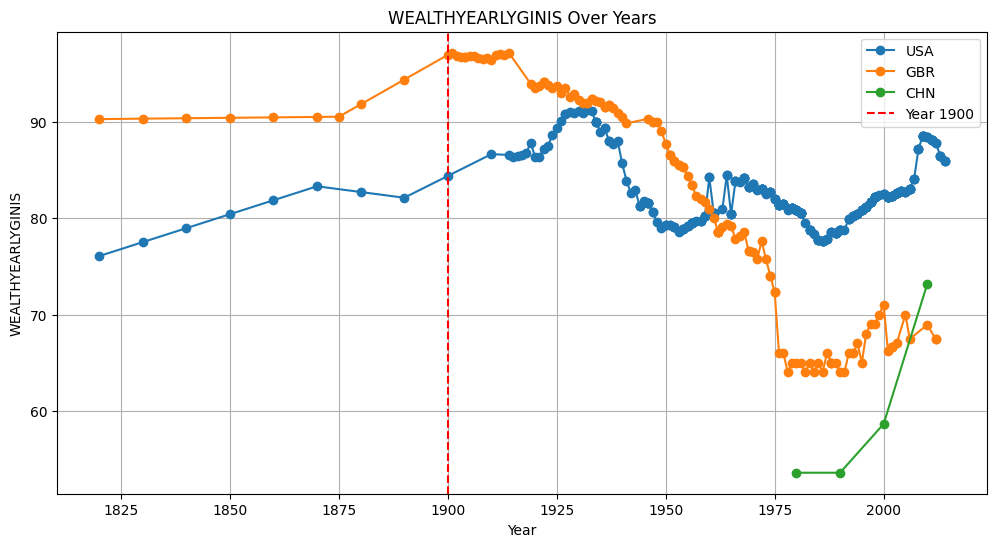

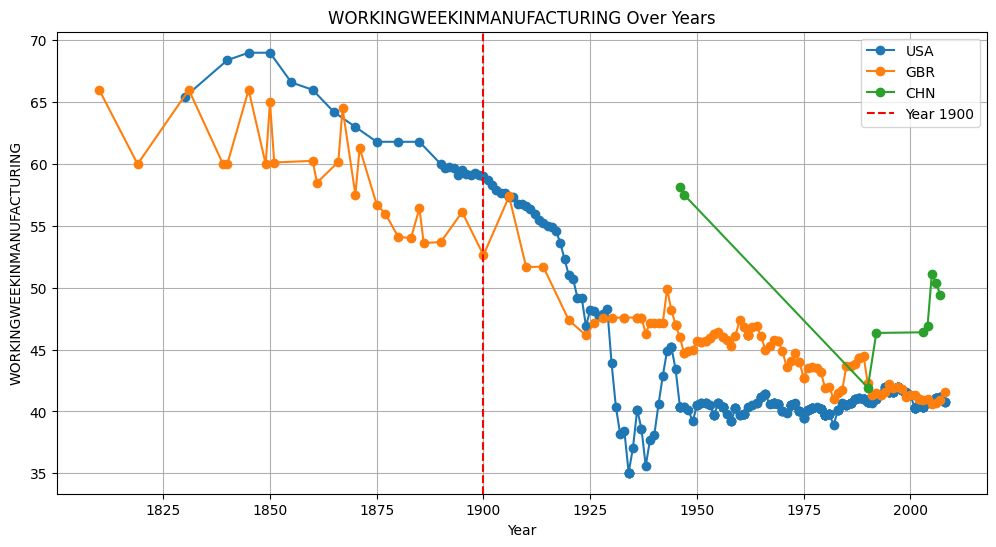

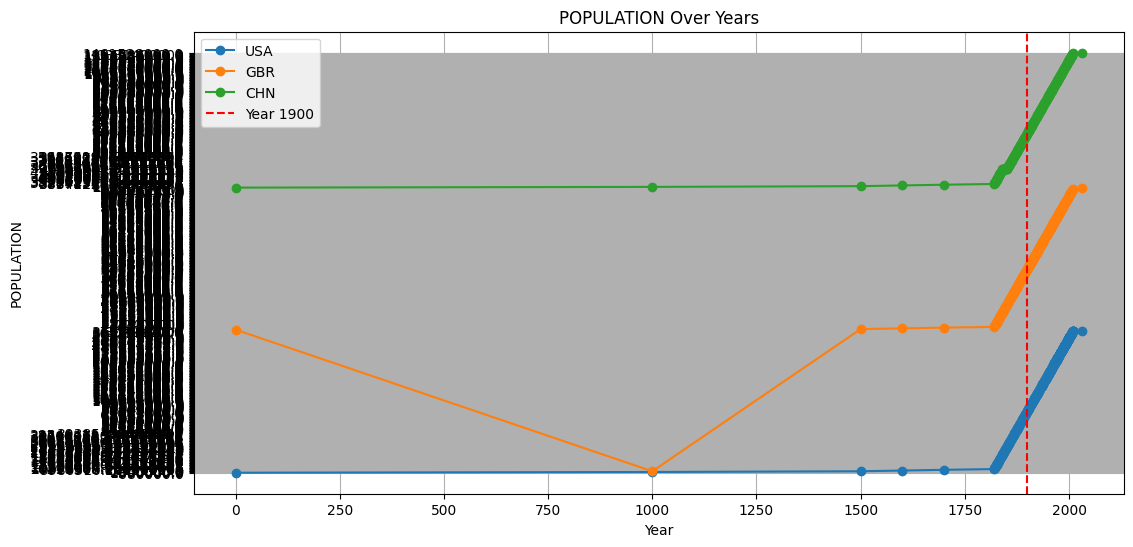

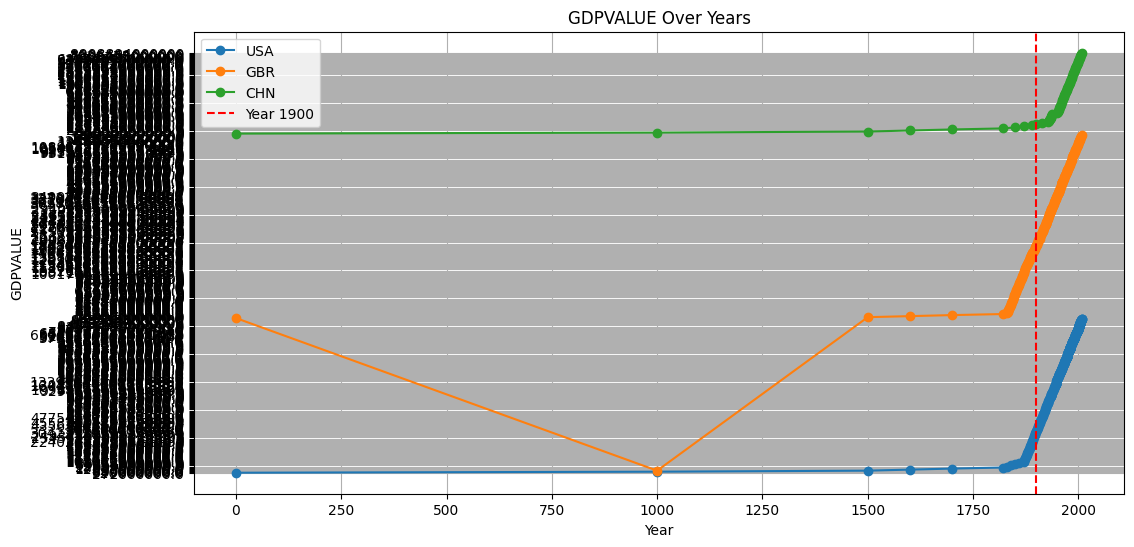

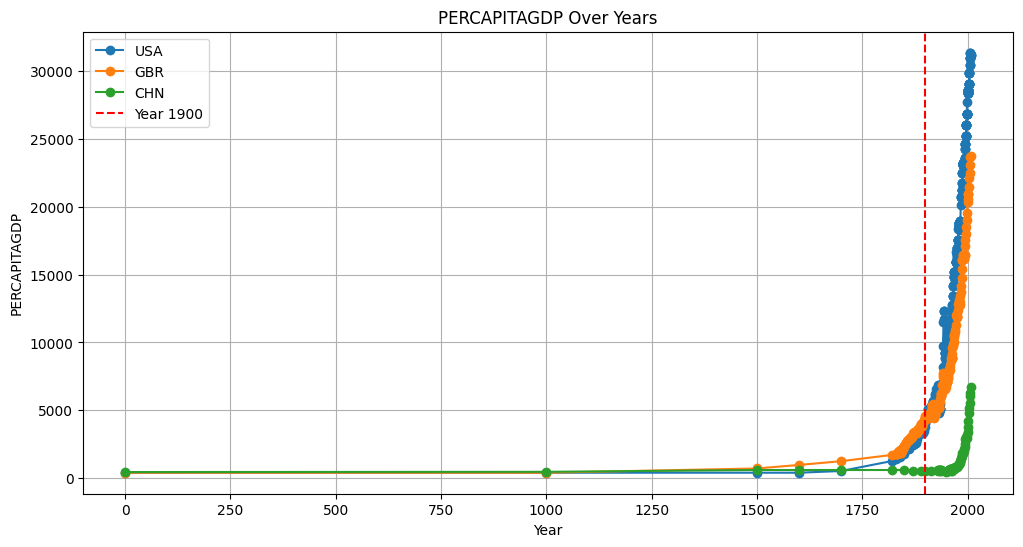

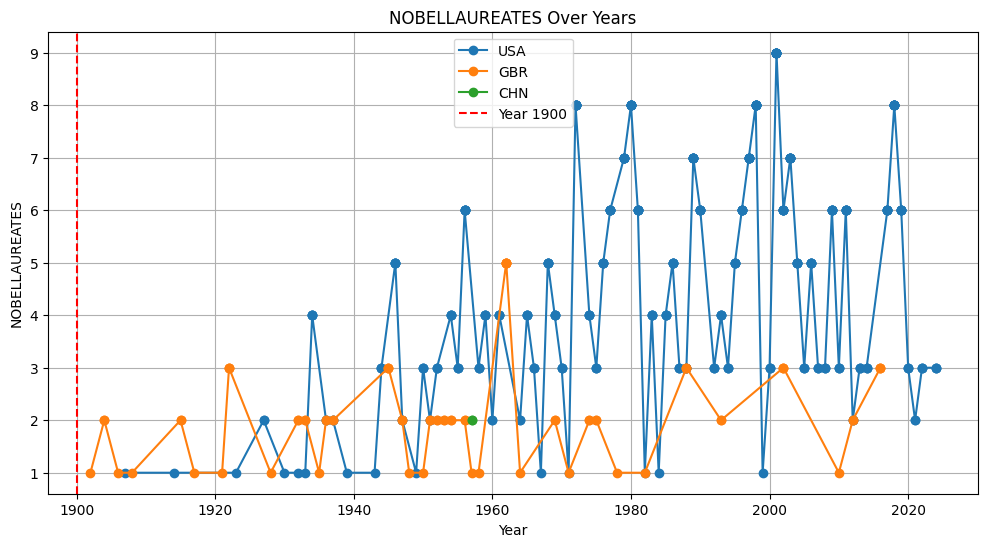

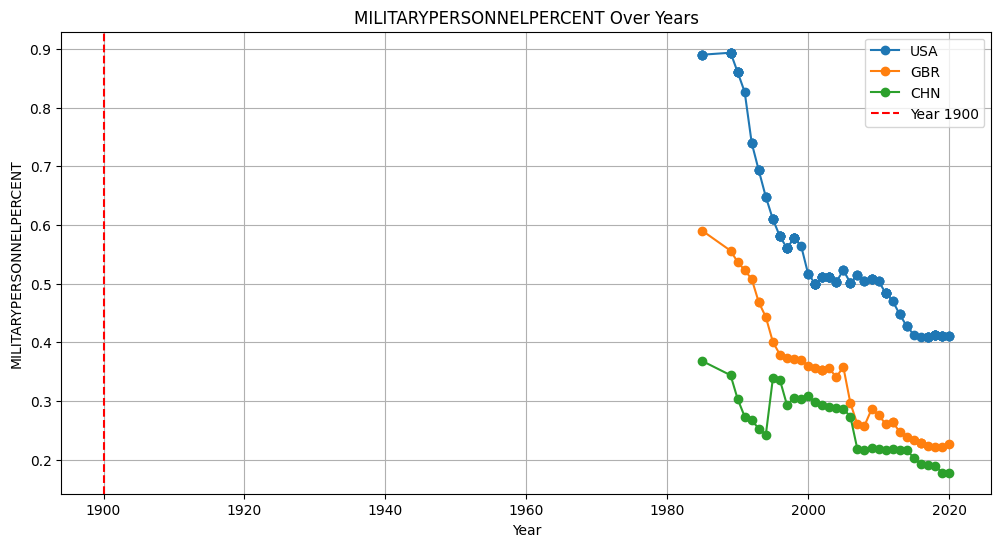

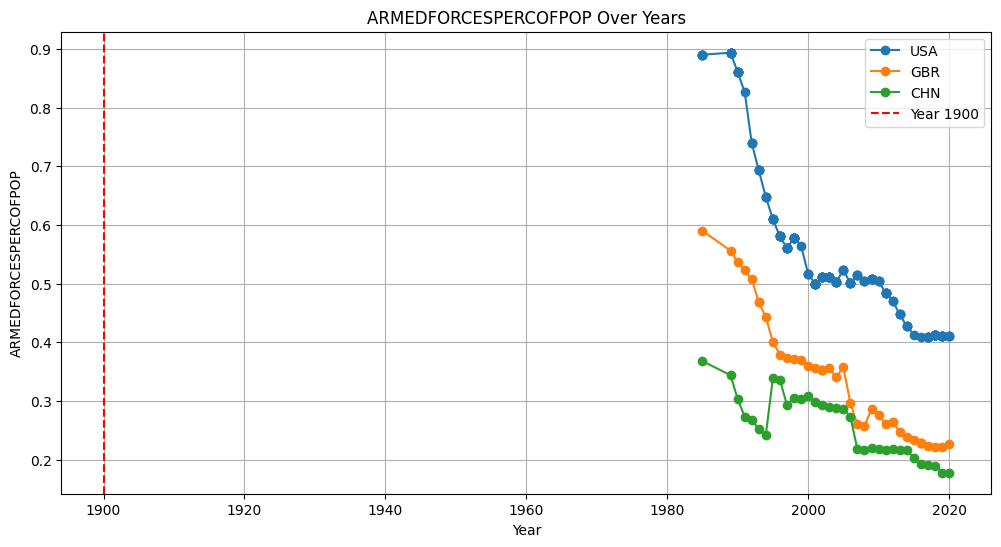

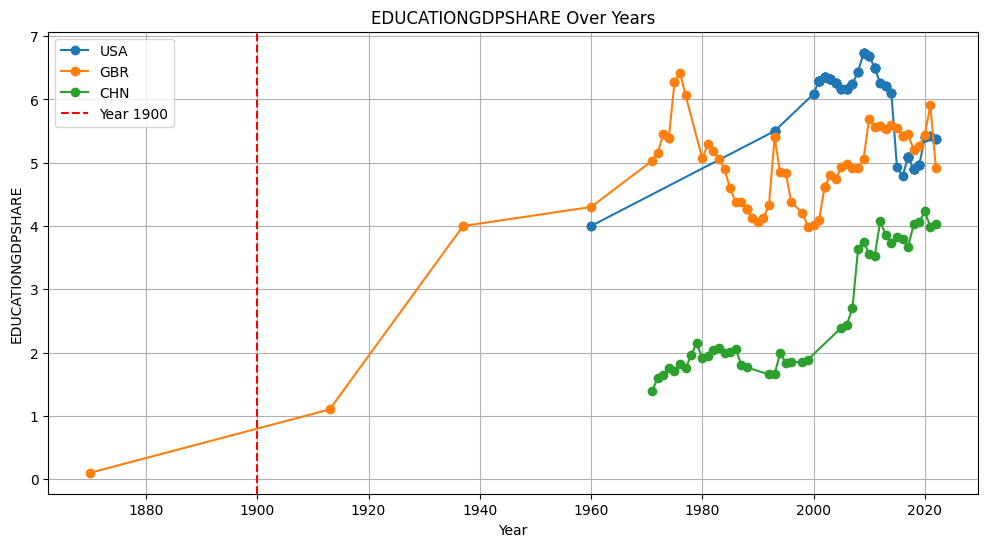

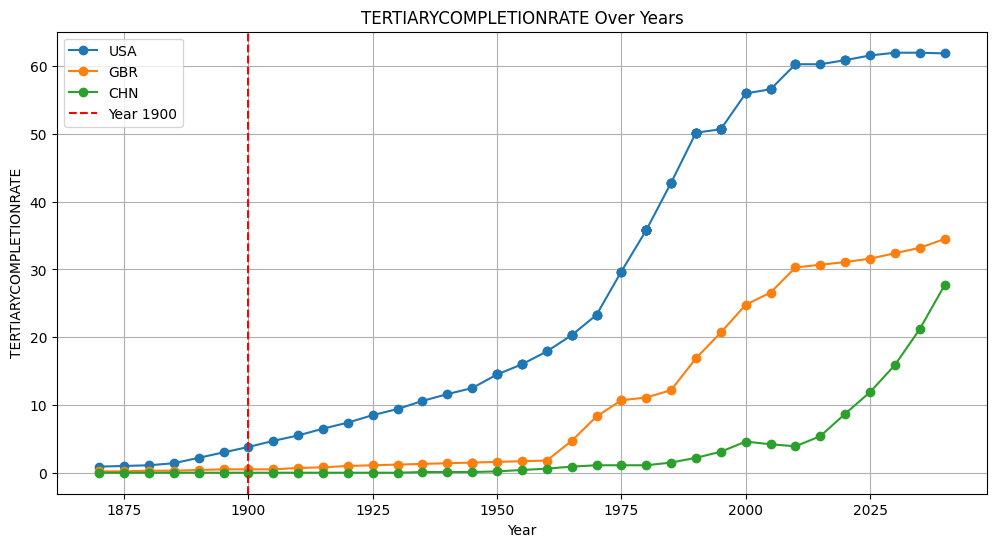

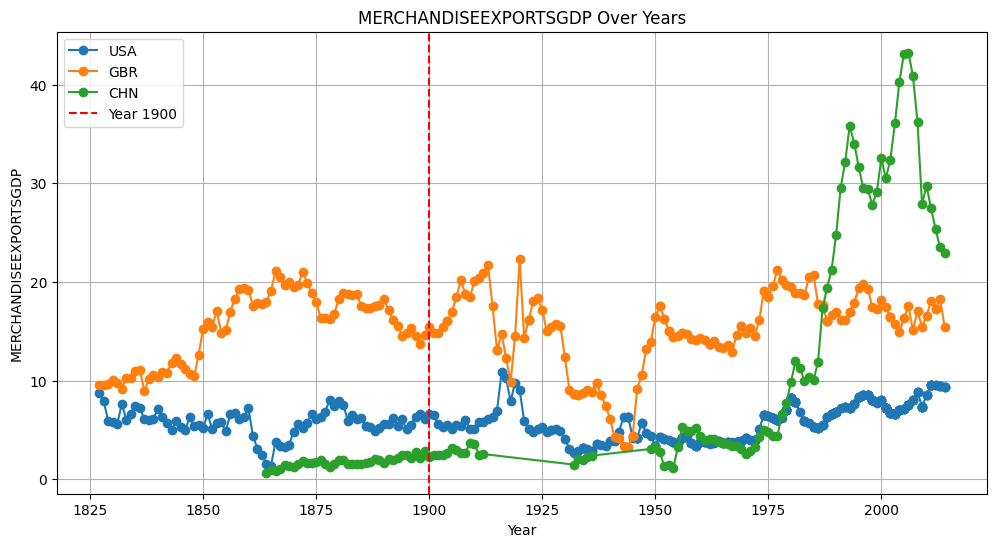

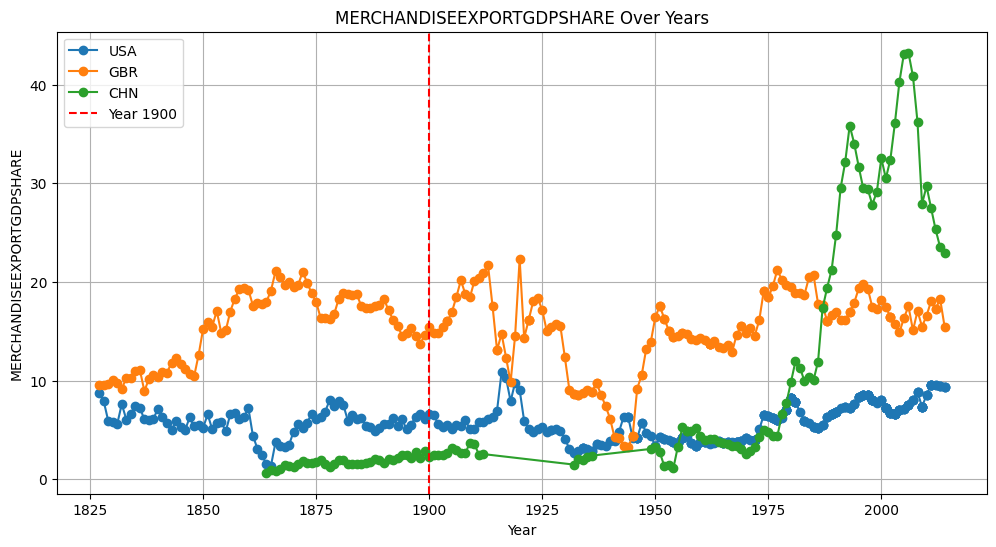

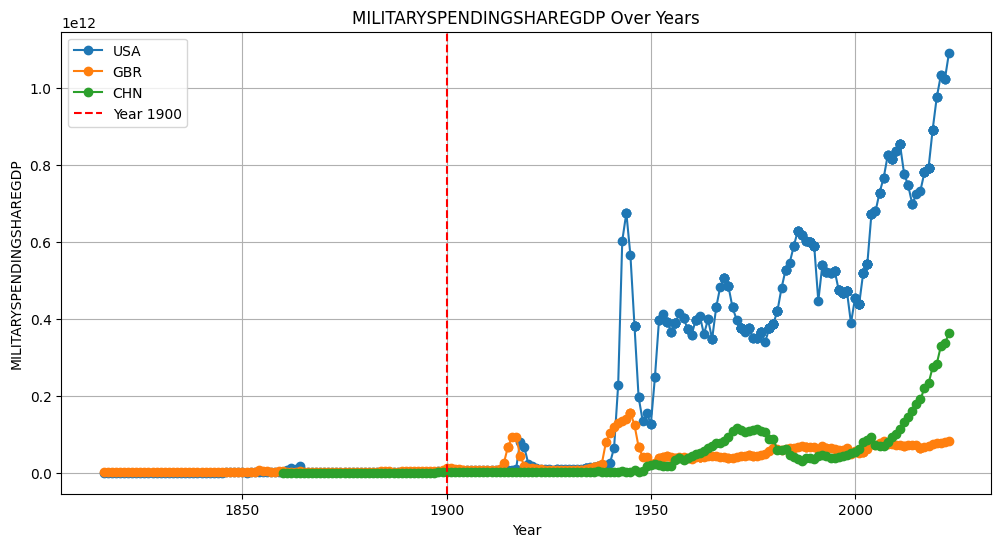

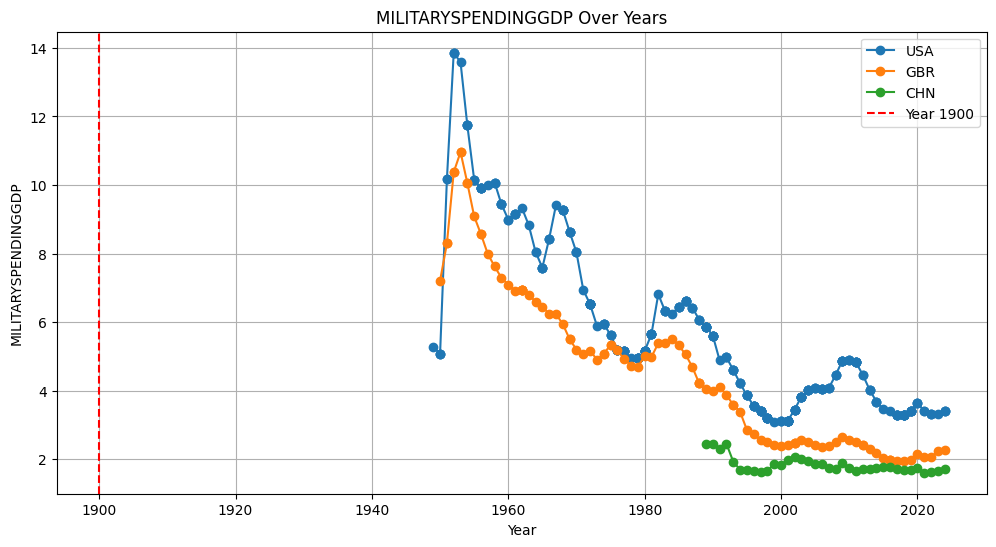

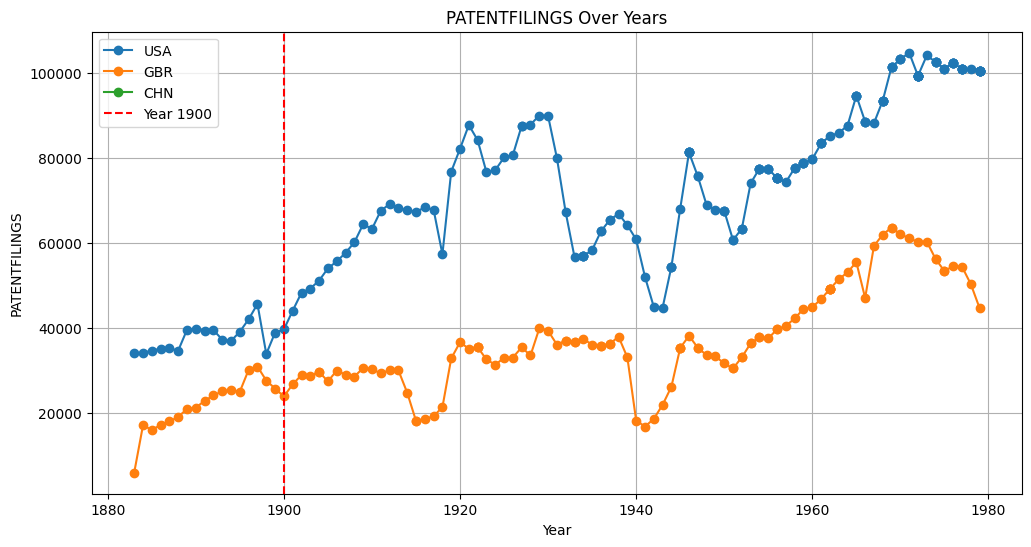

In [8]:
import matplotlib.pyplot as plt

for column in merged_df.columns:
    if column not in ['YEAR', 'COUNTRYCODE']:  # Exclude non-numeric columns
        plt.figure(figsize=(12, 6))
        for country in SELECTED_COUNTRIES:
            country_data = merged_df[merged_df['COUNTRYCODE'] == country].dropna(subset=[column])
            plt.plot(country_data['YEAR'], country_data[column], label=country, marker='o')
        plt.title(f'{column} Over Years')
        plt.xlabel('Year')
        plt.axvline(x=1900, color='red', linestyle='--', label='Year 1900')
        plt.ylabel(column)
        plt.legend()
        plt.grid()
        plt.show()
